In [2]:
# Importación de librerías necesarias para análisis exploratorio
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
import plotly.graph_objects as go

## Carga de Datos

In [3]:
# Carga del dataset de ESS11 
df = pd.read_csv(r'C:\Users\paula\Downloads\Bootcamp\PROYECTO_1\Equality\data\ESS11.csv')

C:\Users\paula\AppData\Local\Temp\ipykernel_11796\275965921.py:2: DtypeWarning: Columns (192,198,666) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\paula\Downloads\Bootcamp\PROYECTO_1\Equality\data\ESS11.csv')


Variables EXPLICATIVAS que se van a utilizar: género (gndr), edad (agea), nivel educativo (edulvlb), país (cntry), partido político votado en las últimas elecciones nacionales España (prtvtges).

Variables DEPENDIENTES que se van a utilizar: apoyo a que las personas sean tratadas igual y a la igualdad de oportunidades (ipeqopta), apoyo a la igualdad salarial (eqpaybg), interés en la política (polintr), percepción sobre la inmigración (imwbcnt), percepción sobre el control de las mujeres sobre los hombres (wsekpwr)

In [4]:
# Crear base de datos limpia eliminando valores no válidos de las variables EXPLICATIVAS:

# 1. De la variable gndr elimina el valor 9.
# 2. De la variable agea elimina el valor 999. 
# 3. De la variable edulvlb elimina los valores 5555, 7777, 8888, 9999. 
# 4. De la variable prtvtges elimina los valores 66, 77, 88, 99.


df_clean = df[
    ~df['gndr'].isin([9]) &
    ~df['agea'].isin([999]) &
    ~df['edulvlb'].isin([5555, 7777, 8888, 9999]) &
    ~df['prtvtges'].isin([66, 77, 88, 99])
].copy()

print(f"Filas originales: {len(df)}")
print(f"Filas después de la limpieza: {len(df_clean)}")
print(f"Filas eliminadas: {len(df) - len(df_clean)}")

Filas originales: 46162
Filas después de la limpieza: 44734
Filas eliminadas: 1428


## Variable Dependiente "ipeqopta": apoyo a que las personas sean tratadas igual y a la igualdad de oportunidades

### Pregunta en la encuesta:

Now I will briefly describe some people. Please listen to each description and tell me how much each person is or is not like you. Use this card for your answer. She/he thinks it is important that every person in the world should be treated equally. She/he believes everyone should have equal opportunities in life.

1:	Very much like me /
2:	Like me /
3:	Somewhat like me /
4:	A little like me /
5:	Not like me /
6: Not like me at all /
66:	Not applicable* /
77:	Refusal* /
88:	Don't know* /
99:	No answer*

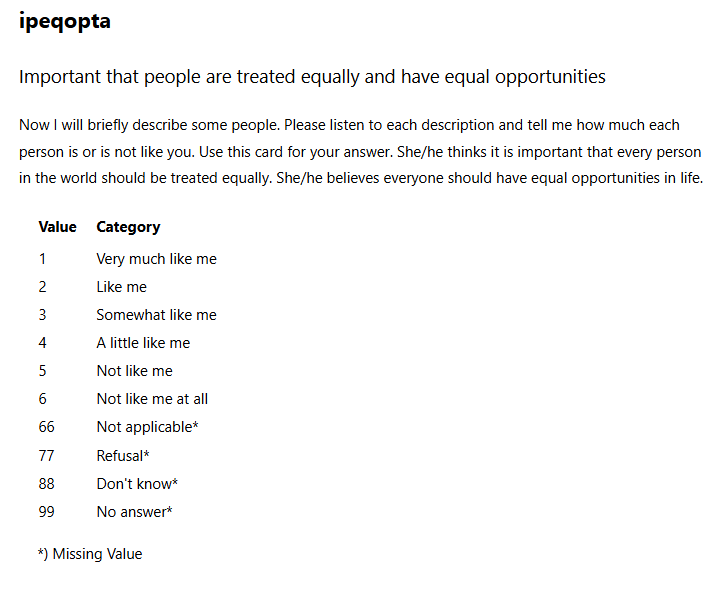

In [5]:
# Filtrar adicionalmente los valores inválidos de la variable ipeqopta (66, 77, 88, 99)
df_clean = df_clean[~df_clean['ipeqopta'].isin([66, 77, 88, 99])].copy()

# Invertir la escala de ipeqopta para que sea más intuitiva:
# Original: 1 (muy importante) a 6 (nada importante)
# Nueva: 1 (nada importante) a 6 (muy importante)
df_clean['ipeqopta'] = 7 - df_clean['ipeqopta']

In [6]:
# Estadísticas descriptivas de la variable ipeqopta
df_clean['ipeqopta'].describe()

count    44035.000000
mean         4.975678
std          1.052371
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          6.000000
Name: ipeqopta, dtype: float64

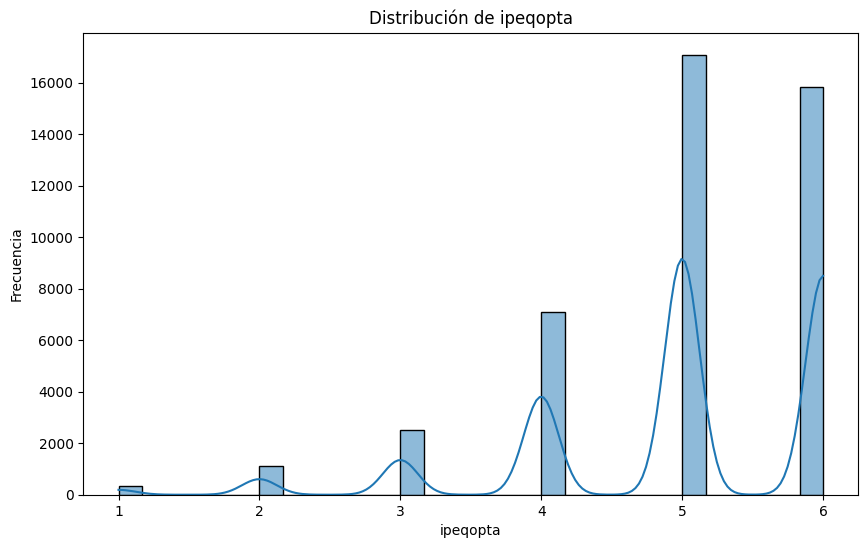

In [7]:
# Visualización de la distribución de la variable ipeqopta
plt.figure(figsize=(10,6))
sns.histplot(df_clean['ipeqopta'], bins=30, kde=True)
plt.title('Distribución de ipeqopta')
plt.xlabel('ipeqopta')
plt.ylabel('Frecuencia')
plt.show()

In [8]:
#Test de normalidad Shapiro-Wilk para la variable ipeqopta
shapiro_test = stats.shapiro(df_clean['ipeqopta'])
print(f'Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')
if shapiro_test.pvalue > 0.05:
        print(f'ipeqopta is likely normally distributed (fail to reject H0)')
else:
        print(f'ipeqopta is likely not normally distributed (reject H0)')

Shapiro-Wilk Test: W=0.820381466255159, p-value=3.4719662535325835e-109
ipeqopta is likely not normally distributed (reject H0)


C:\Users\paula\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 44035.
  res = hypotest_fun_out(*samples, **kwds)


### Género

1= Hombre 2= Mujer

In [9]:
# Análisis de la variable ipeqopta según género. 1=Hombre, 2=Mujer
df_clean.groupby('gndr')['ipeqopta'].describe()

,count,mean,std,min,25%,50%,75%,max
gndr,,,,,,,,
1,20573.0,4.901959,1.076214,1.0,4.0,5.0,6.0,6.0
2,23462.0,5.040321,1.026686,1.0,5.0,5.0,6.0,6.0


In [10]:
# Frecuencia en las respuestas de ipeqopta por género
pd.crosstab(df_clean['ipeqopta'], df_clean['gndr'], normalize='columns') * 100  

gndr,1,2
ipeqopta,,
1,0.850629,0.758674
2,3.081709,2.101270
3,6.372430,5.114653
4,17.177854,15.228881
5,39.751130,37.967778
6,32.766247,38.828744


In [11]:
# Gráfico de la frecuencia en las respuestas de ipeqopta por género
# Mapear los valores de género antes de crear el gráfico
df_plot = df_clean.copy()
df_plot['gndr'] = df_plot['gndr'].map({1: 'Hombre', 2: 'Mujer'})

fig = px.histogram(df_plot, x='ipeqopta', color='gndr', barmode='group',
                   category_orders={'ipeqopta': [1, 2, 3, 4, 5]},
                   labels={'ipeqopta': 'Apoyo a la igualdad de oportunidades', 'gndr': 'Género'},
                   title='Frecuencia de respuestas en ipeqopta por género',
                   histnorm='percent')
fig.update_layout(bargap=0.2)
fig.show()  

Correlación de Spearman

In [12]:
from scipy.stats import spearmanr

# Correlación entre ipeqopta y género

# Recodificar género: Hombre=0, Mujer=1
df_clean['gndr_binary'] = df_clean['gndr'].map({1: 0, 2: 1})

# Calcular la correlación de Spearman (no paramétrica, apropiada para datos no normales)
spearman_corr, spearman_pvalue = spearmanr(df_clean['ipeqopta'], df_clean['gndr_binary'])

# Interpretación de la correlación entre ipeqopta y género
print("=" * 80)
print("CORRELACIÓN: IPEQOPTA vs GÉNERO")
print("=" * 80)
print(f"\n📊 Coeficiente de correlación de Spearman: {spearman_corr:.4f}")
print(f"📊 P-value: {spearman_pvalue:.4e}\n")

print("💡 INTERPRETACIÓN:")
if spearman_corr < 0:
    print(f"   ✓ Correlación NEGATIVA ({spearman_corr:.4f})")
    print("   → Las MUJERES (codificadas como 1) tienen valores MÁS BAJOS de ipeqopta")
    print("   → Valores bajos de ipeqopta = MENOR apoyo a la igualdad")
    print("   → CONCLUSIÓN: Las MUJERES apoyan MENOS la igualdad de oportunidades")
elif spearman_corr > 0:
    print(f"   ✓ Correlación POSITIVA (+{spearman_corr:.4f})")
    print("   → Las MUJERES (codificadas como 1) tienen valores MÁS ALTOS de ipeqopta")
    print("   → Valores altos de ipeqopta = MAYOR apoyo a la igualdad")
    print("   → CONCLUSIÓN: Las MUJERES apoyan MÁS la igualdad de oportunidades")
else:
    print("   ✓ Correlación CERO - No hay diferencia significativa entre géneros")

# Magnitud
abs_corr_gender = abs(spearman_corr)
if abs_corr_gender < 0.20:
    fuerza_gender = "MUY DÉBIL"
elif abs_corr_gender < 0.40:
    fuerza_gender = "DÉBIL"
elif abs_corr_gender < 0.60:
    fuerza_gender = "MODERADA"
elif abs_corr_gender < 0.80:
    fuerza_gender = "FUERTE"
else:
    fuerza_gender = "MUY FUERTE"

print(f"\n   📏 Fuerza de la correlación: {fuerza_gender} (|ρ| = {abs_corr_gender:.4f})")

# Significancia estadística
if spearman_pvalue < 0.001:
    print(f"   ✅ Altamente significativa (p < 0.001)")
elif spearman_pvalue < 0.05:
    print(f"   ✅ Estadísticamente significativa (p < 0.05)")
else:
    print(f"   ❌ No significativa (p >= 0.05)")
    
print("=" * 80)

CORRELACIÓN: IPEQOPTA vs GÉNERO

📊 Coeficiente de correlación de Spearman: 0.0686
📊 P-value: 5.0151e-47

💡 INTERPRETACIÓN:
   ✓ Correlación POSITIVA (+0.0686)
   → Las MUJERES (codificadas como 1) tienen valores MÁS ALTOS de ipeqopta
   → Valores altos de ipeqopta = MAYOR apoyo a la igualdad
   → CONCLUSIÓN: Las MUJERES apoyan MÁS la igualdad de oportunidades

   📏 Fuerza de la correlación: MUY DÉBIL (|ρ| = 0.0686)
   ✅ Altamente significativa (p < 0.001)


### Edad

In [13]:
# Análisis de la variable ipeqopta según edad en intervalos de 10 años empezando por la edad mínima de los entrevistados
min_age = df_clean['agea'].min()
df_clean.groupby(pd.cut(df_clean['agea'], bins=np.arange(min_age, 100, 10))).agg({'ipeqopta': ['mean', 'count']})

C:\Users\paula\AppData\Local\Temp\ipykernel_11796\650849108.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



ipeqopta      
              mean count
agea                    
(15, 25]  5.056247  4498
(25, 35]  5.026220  5492
(35, 45]  4.986568  6775
(45, 55]  4.945098  7486
(55, 65]  4.954475  7776
(65, 75]  4.958750  7200
(75, 85]  4.937324  3909
(85, 95]  4.921348   801

In [14]:
# Frecuencia en las respuestas de ipeqopta por edad en intervalos de 10 años empezando por la edad mínima de los entrevistados
pd.crosstab(df_clean['ipeqopta'], pd.cut(df_clean['agea'], bins=np.arange(min_age, 100, 10)), normalize='columns') * 100


agea,"(15, 25]","(25, 35]","(35, 45]","(45, 55]","(55, 65]","(65, 75]","(75, 85]","(85, 95]"
ipeqopta,,,,,,,,
1,0.578035,0.746540,0.649446,0.801496,0.964506,0.875000,0.869788,1.248439
2,1.978657,2.203205,2.656827,2.791878,2.662037,2.638889,2.711691,2.746567
3,5.246776,5.152950,5.682657,6.171520,5.761317,5.666667,6.062932,5.617978
4,14.806581,15.677349,16.029520,16.991718,15.920782,16.388889,16.705040,16.729089
5,38.216985,38.018937,38.361624,37.817259,39.956276,39.416667,39.473011,40.324594
6,39.172966,38.201020,36.619926,35.426129,34.735082,35.013889,34.177539,33.333333


In [15]:
# Gráfico de la media de ipeqopta por edad en intervalos de 10 años
age_means = df_clean.groupby(pd.cut(df_clean['agea'], bins=np.arange(min_age, 100, 10)))['ipeqopta'].mean().reset_index()
age_means.columns = ['age_group', 'ipeqopta_mean']

# Convertir los intervalos a strings para mejor visualización
age_means['age_label'] = age_means['age_group'].astype(str)

fig = px.line(age_means, 
              x='age_label', 
              y='ipeqopta_mean',
              markers=True,
              labels={'age_label': 'Grupo de edad', 'ipeqopta_mean': 'Media de apoyo a la igualdad de oportunidades'},
              title='Media de ipeqopta por grupo de edad')

fig.update_layout(xaxis_tickangle=-45, height=500)
fig.show()

C:\Users\paula\AppData\Local\Temp\ipykernel_11796\1401212563.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Correlación de Spearman

In [16]:
# Correlación entre ipeqopta y edad

# Calcular la correlación de Spearman (no paramétrica, apropiada para datos no normales)
spearman_corr_age, spearman_pvalue_age = spearmanr(df_clean['ipeqopta'], df_clean['agea'])

# Interpretación de la correlación entre ipeqopta y edad
print("=" * 80)
print("CORRELACIÓN: IPEQOPTA vs EDAD")
print("=" * 80)
print(f"\n📊 Coeficiente de correlación de Spearman: {spearman_corr_age:.4f}")
print(f"📊 P-value: {spearman_pvalue_age:.4e}\n")

print("💡 INTERPRETACIÓN:")
if spearman_corr_age < 0:
    print(f"   ✓ Correlación NEGATIVA ({spearman_corr_age:.4f})")
    print("   → A MENOR edad, valores MÁS ALTOS de ipeqopta")
    print("   → Valores altos de ipeqopta = MAYOR apoyo a la igualdad")
    print("   → CONCLUSIÓN: Las personas MÁS JÓVENES apoyan MÁS")
    print("                  la igualdad de oportunidades")
elif spearman_corr_age > 0:
    print(f"   ✓ Correlación POSITIVA (+{spearman_corr_age:.4f})")
    print("   → A MAYOR edad, valores MÁS ALTOS de ipeqopta")
    print("   → Valores altos de ipeqopta = MAYOR apoyo a la igualdad")
    print("   → CONCLUSIÓN: Las personas MAYORES apoyan MÁS")
    print("                  la igualdad de oportunidades")
else:
    print("   ✓ Correlación CERO - No hay relación lineal entre edad e ipeqopta")

# Magnitud
abs_corr_age = abs(spearman_corr_age)
if abs_corr_age < 0.20:
    fuerza_age = "MUY DÉBIL"
elif abs_corr_age < 0.40:
    fuerza_age = "DÉBIL"
elif abs_corr_age < 0.60:
    fuerza_age = "MODERADA"
elif abs_corr_age < 0.80:
    fuerza_age = "FUERTE"
else:
    fuerza_age = "MUY FUERTE"

print(f"\n   📏 Fuerza de la correlación: {fuerza_age} (|ρ| = {abs_corr_age:.4f})")

# Significancia estadística
if spearman_pvalue_age < 0.001:
    print(f"   ✅ Altamente significativa (p < 0.001)")
elif spearman_pvalue_age < 0.05:
    print(f"   ✅ Estadísticamente significativa (p < 0.05)")
else:
    print(f"   ❌ No significativa (p >= 0.05)")

print("=" * 80)

CORRELACIÓN: IPEQOPTA vs EDAD

📊 Coeficiente de correlación de Spearman: -0.0332
📊 P-value: 3.0747e-12

💡 INTERPRETACIÓN:
   ✓ Correlación NEGATIVA (-0.0332)
   → A MENOR edad, valores MÁS ALTOS de ipeqopta
   → Valores altos de ipeqopta = MAYOR apoyo a la igualdad
   → CONCLUSIÓN: Las personas MÁS JÓVENES apoyan MÁS
                  la igualdad de oportunidades

   📏 Fuerza de la correlación: MUY DÉBIL (|ρ| = 0.0332)
   ✅ Altamente significativa (p < 0.001)


## Nivel de educación

0	Not completed ISCED level 1

113	ISCED 1, completed primary education

129	Vocational ISCED 2C < 2 years, no access ISCED 3

212	General/pre-vocational ISCED 2A/2B, access ISCED 3 vocational

213	General ISCED 2A, access ISCED 3A general/all 3

221	Vocational ISCED 2C >= 2 years, no access ISCED 3

222	Vocational ISCED 2A/2B, access ISCED 3 vocational

223	Vocational ISCED 2, access ISCED 3 general/all

229	Vocational ISCED 3C < 2 years, no access ISCED 5

311	General ISCED 3 >=2 years, no access ISCED 5

312	General ISCED 3A/3B, access ISCED 5B/lower tier 5A

313	General ISCED 3A, access upper tier ISCED 5A/all 5

321	Vocational ISCED 3C >= 2 years, no access ISCED 5

322	Vocational ISCED 3A, access ISCED 5B/ lower tier 5A

323	Vocational ISCED 3A, access upper tier ISCED 5A/all 5

412	General ISCED 4A/4B, access ISCED 5B/lower tier 5A

413	General ISCED 4A, access upper tier ISCED 5A/all 5

421	ISCED 4 programmes without access ISCED 5

422	Vocational ISCED 4A/4B, access ISCED 5B/lower tier 5A

423	Vocational ISCED 4A, access upper tier ISCED 5A/all 5

510	ISCED 5A short, intermediate/academic/general tertiary below bachelor

520	ISCED 5B short, advanced vocational qualifications

610	ISCED 5A medium, bachelor/equivalent from lower tier tertiary

620	ISCED 5A medium, bachelor/equivalent from upper/single tier tertiary

710	ISCED 5A long, master/equivalent from lower tier tertiary

720	ISCED 5A long, master/equivalent from upper/single tier tertiary

800	ISCED 6, doctoral degree

In [17]:
# Crear mapeo de nivel educativo a escala ordinal (0-26)
# De menor a mayor nivel educativo
education_scale = {
    0: 0,      # Not completed ISCED level 1
    113: 1,    # ISCED 1, completed primary education
    129: 2,    # Vocational ISCED 2C < 2 years, no access ISCED 3
    212: 3,    # General/pre-vocational ISCED 2A/2B, access ISCED 3 vocational
    213: 4,    # General ISCED 2A, access ISCED 3A general/all 3
    221: 5,    # Vocational ISCED 2C >= 2 years, no access ISCED 3
    222: 6,    # Vocational ISCED 2A/2B, access ISCED 3 vocational
    223: 7,    # Vocational ISCED 2, access ISCED 3 general/all
    229: 8,    # Vocational ISCED 3C < 2 years, no access ISCED 5
    311: 9,    # General ISCED 3 >=2 years, no access ISCED 5
    312: 10,   # General ISCED 3A/3B, access ISCED 5B/lower tier 5A
    313: 11,   # General ISCED 3A, access upper tier ISCED 5A/all 5
    321: 12,   # Vocational ISCED 3C >= 2 years, no access ISCED 5
    322: 13,   # Vocational ISCED 3A, access ISCED 5B/ lower tier 5A
    323: 14,   # Vocational ISCED 3A, access upper tier ISCED 5A/all 5
    412: 15,   # General ISCED 4A/4B, access ISCED 5B/lower tier 5A
    413: 16,   # General ISCED 4A, access upper tier ISCED 5A/all 5
    421: 17,   # ISCED 4 programmes without access ISCED 5
    422: 18,   # Vocational ISCED 4A/4B, access ISCED 5B/lower tier 5A
    423: 19,   # Vocational ISCED 4A, access upper tier ISCED 5A/all 5
    510: 20,   # ISCED 5A short, intermediate/academic/general tertiary below bachelor
    520: 21,   # ISCED 5B short, advanced vocational qualifications
    610: 22,   # ISCED 5A medium, bachelor/equivalent from lower tier tertiary
    620: 23,   # ISCED 5A medium, bachelor/equivalent from upper/single tier tertiary
    710: 24,   # ISCED 5A long, master/equivalent from lower tier tertiary
    720: 25,   # ISCED 5A long, master/equivalent from upper/single tier tertiary
    800: 26    # ISCED 6, doctoral degree
}

# Añadir columna de nivel educativo ordinal
df_clean['education_level'] = df_clean['edulvlb'].map(education_scale)

print("📚 Mapeo de nivel educativo completado")
print(f"Valores únicos en education_level: {sorted(df_clean['education_level'].dropna().unique())}")

📚 Mapeo de nivel educativo completado
Valores únicos en education_level: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26)]


In [18]:
# Análisis de la variable ipeqopta según nivel educativo
df_clean.groupby('education_level')['ipeqopta'].describe()

,count,mean,std,min,25%,50%,75%,max
education_level,,,,,,,,
0,379.0,4.894459,1.165848,1.0,4.00,5.0,6.0,6.0
1,2379.0,4.923918,1.074834,1.0,4.00,5.0,6.0,6.0
2,23.0,5.173913,0.984063,2.0,5.00,5.0,6.0,6.0
3,667.0,5.061469,1.003358,1.0,5.00,5.0,6.0,6.0
4,4694.0,4.922028,1.068849,1.0,4.00,5.0,6.0,6.0
5,44.0,4.409091,1.244863,2.0,3.75,5.0,5.0,6.0
6,396.0,5.045455,1.078186,1.0,5.00,5.0,6.0,6.0
7,35.0,4.057143,1.349136,1.0,3.00,4.0,5.0,6.0
8,717.0,4.818689,1.125150,1.0,4.00,5.0,6.0,6.0


In [19]:
# Gráfico de la media de ipeqopta por nivel educativo
education_means = df_clean.groupby('education_level')['ipeqopta'].mean().reset_index()
education_means.columns = ['education_level', 'ipeqopta_mean']

fig = px.line(education_means, 
              x='education_level', 
              y='ipeqopta_mean',
              markers=True,
              labels={'education_level': 'Nivel Educativo (0=Básico, 26=Doctorado)', 
                      'ipeqopta_mean': 'Media de apoyo a la igualdad de oportunidades'},
              title='Media de ipeqopta por nivel educativo')

fig.update_layout(height=500)
fig.show()

Correlación de Spearman

In [20]:
# Correlación entre ipeqopta y nivel educativo

# Filtrar valores válidos (sin NaN)
df_education = df_clean[df_clean['education_level'].notna()].copy()

# Calcular la correlación de Spearman (no paramétrica, apropiada para datos no normales)
spearman_corr_edu, spearman_pvalue_edu = spearmanr(df_education['ipeqopta'], df_education['education_level'])

# Interpretación de la correlación entre ipeqopta y nivel educativo
print("=" * 80)
print("CORRELACIÓN: IPEQOPTA vs NIVEL EDUCATIVO")
print("=" * 80)
print(f"\n📊 Coeficiente de correlación de Spearman: {spearman_corr_edu:.4f}")
print(f"📊 P-value: {spearman_pvalue_edu:.4e}\n")

print("💡 INTERPRETACIÓN:")
if spearman_corr_edu < 0:
    print(f"   ✓ Correlación NEGATIVA ({spearman_corr_edu:.4f})")
    print("   → A MENOR nivel educativo, valores MÁS ALTOS de ipeqopta")
    print("   → Valores altos de ipeqopta = MAYOR apoyo a la igualdad")
    print("   → CONCLUSIÓN: Las personas con MENOR nivel educativo apoyan MÁS")
    print("                  la igualdad de oportunidades")
elif spearman_corr_edu > 0:
    print(f"   ✓ Correlación POSITIVA (+{spearman_corr_edu:.4f})")
    print("   → A MAYOR nivel educativo, valores MÁS ALTOS de ipeqopta")
    print("   → Valores altos de ipeqopta = MAYOR apoyo a la igualdad")
    print("   → CONCLUSIÓN: Las personas con MAYOR nivel educativo apoyan MÁS")
    print("                  la igualdad de oportunidades")
else:
    print("   ✓ Correlación CERO - No hay relación lineal entre nivel educativo e ipeqopta")

# Magnitud
abs_corr_edu = abs(spearman_corr_edu)
if abs_corr_edu < 0.20:
    fuerza_edu = "MUY DÉBIL"
elif abs_corr_edu < 0.40:
    fuerza_edu = "DÉBIL"
elif abs_corr_edu < 0.60:
    fuerza_edu = "MODERADA"
elif abs_corr_edu < 0.80:
    fuerza_edu = "FUERTE"
else:
    fuerza_edu = "MUY FUERTE"

print(f"\n   📏 Fuerza de la correlación: {fuerza_edu} (|ρ| = {abs_corr_edu:.4f})")

# Significancia estadística
if spearman_pvalue_edu < 0.001:
    print(f"   ✅ Altamente significativa (p < 0.001)")
elif spearman_pvalue_edu < 0.05:
    print(f"   ✅ Estadísticamente significativa (p < 0.05)")
else:
    print(f"   ❌ No significativa (p >= 0.05)")

print("=" * 80)

CORRELACIÓN: IPEQOPTA vs NIVEL EDUCATIVO

📊 Coeficiente de correlación de Spearman: 0.0545
📊 P-value: 2.4101e-30

💡 INTERPRETACIÓN:
   ✓ Correlación POSITIVA (+0.0545)
   → A MAYOR nivel educativo, valores MÁS ALTOS de ipeqopta
   → Valores altos de ipeqopta = MAYOR apoyo a la igualdad
   → CONCLUSIÓN: Las personas con MAYOR nivel educativo apoyan MÁS
                  la igualdad de oportunidades

   📏 Fuerza de la correlación: MUY DÉBIL (|ρ| = 0.0545)
   ✅ Altamente significativa (p < 0.001)


## País

In [21]:
# Análisis de la variable ipeqopta según país
df_clean.groupby('cntry')['ipeqopta'].describe()

,count,mean,std,min,25%,50%,75%,max
cntry,,,,,,,,
AT,2300.0,5.154783,0.970396,1.0,5.0,5.0,6.0,6.0
BE,1549.0,5.097482,0.902294,1.0,5.0,5.0,6.0,6.0
BG,2213.0,4.998192,1.085411,1.0,4.0,5.0,6.0,6.0
CH,1349.0,5.069681,0.997568,1.0,5.0,5.0,6.0,6.0
CY,638.0,5.374608,0.799793,1.0,5.0,6.0,6.0,6.0
DE,2360.0,5.071610,0.948638,1.0,5.0,5.0,6.0,6.0
ES,1084.0,5.413284,0.820360,1.0,5.0,6.0,6.0,6.0
FI,1528.0,5.089005,0.981124,1.0,5.0,5.0,6.0,6.0
FR,1734.0,5.207036,1.026671,1.0,5.0,6.0,6.0,6.0


In [22]:
# Visualización de la variable ipeqopta por país en un mapa de Europa interactivo
country_data = df_clean.groupby('cntry')['ipeqopta'].mean().reset_index()
country_data.columns = ['country', 'ipeqopta_mean']

# Mapeos de códigos de país
iso2_to_iso3 = {'AT': 'AUT', 'BE': 'BEL', 'BG': 'BGR', 'CH': 'CHE', 'CY': 'CYP', 'DE': 'DEU', 
                'ES': 'ESP', 'FI': 'FIN', 'FR': 'FRA', 'GB': 'GBR', 'GR': 'GRC', 'HR': 'HRV', 
                'HU': 'HUN', 'IE': 'IRL', 'IL': 'ISR', 'IS': 'ISL', 'IT': 'ITA', 'LT': 'LTU', 
                'LV': 'LVA', 'ME': 'MNE', 'NL': 'NLD', 'NO': 'NOR', 'PL': 'POL', 'PT': 'PRT', 
                'RS': 'SRB', 'SE': 'SWE', 'SI': 'SVN', 'SK': 'SVK'}

iso2_to_name = {'AT': 'Austria', 'BE': 'Bélgica', 'BG': 'Bulgaria', 'CH': 'Suiza', 'CY': 'Chipre',
                'DE': 'Alemania', 'ES': 'España', 'FI': 'Finlandia', 'FR': 'Francia', 'GB': 'Reino Unido',
                'GR': 'Grecia', 'HR': 'Croacia', 'HU': 'Hungría', 'IE': 'Irlanda', 'IL': 'Israel',
                'IS': 'Islandia', 'IT': 'Italia', 'LT': 'Lituania', 'LV': 'Letonia', 'ME': 'Montenegro',
                'NL': 'Países Bajos', 'NO': 'Noruega', 'PL': 'Polonia', 'PT': 'Portugal', 'RS': 'Serbia',
                'SE': 'Suecia', 'SI': 'Eslovenia', 'SK': 'Eslovaquia'}

country_data['country_iso3'] = country_data['country'].map(iso2_to_iso3)
country_data['country_name'] = country_data['country'].map(iso2_to_name)

# Crear mapa interactivo
fig = px.choropleth(country_data, locations='country_iso3', locationmode='ISO-3', 
                    color='ipeqopta_mean', hover_name='country_name',
                    hover_data={'ipeqopta_mean': ':.2f', 'country': False, 'country_iso3': False, 'country_name': False},
                    color_continuous_scale='RdYlGn', range_color=[3.5, 5.5], scope='europe',
                    title='Apoyo a la igualdad de oportunidades por país (ipeqopta)',
                    labels={'ipeqopta_mean': 'Media ipeqopta (1-6)'})

fig.update_layout(geo=dict(showframe=False, showcoastlines=True, projection_type='natural earth'),
                  height=600, width=900)
fig.show()

## Partido Político España

1=PP 2=PSOE 3=VOX 4=SUMAR 5=ERC 6=JuntsxCat 7=EH-Bildu 8=EAJ-PNV 9=BNG 10=CoaliciónCanaria(CC) 11=UPN 12= PACMA 50=Other 51=BlankVote 52=InvalidVote

In [23]:
#Análisis de la variable ipeqopta según partido político votado en España en las últimas elecciones nacionales.
df_clean.groupby('prtvtges')['ipeqopta'].describe()

,count,mean,std,min,25%,50%,75%,max
prtvtges,,,,,,,,
1.0,318.0,5.349057,0.874191,1.0,5.00,6.0,6.0,6.0
2.0,412.0,5.427184,0.808735,1.0,5.00,6.0,6.0,6.0
3.0,73.0,5.328767,0.913704,2.0,5.00,6.0,6.0,6.0
4.0,117.0,5.564103,0.758681,2.0,5.00,6.0,6.0,6.0
5.0,25.0,5.440000,0.768115,3.0,5.00,6.0,6.0,6.0
6.0,19.0,5.263158,0.933459,3.0,5.00,6.0,6.0,6.0
7.0,18.0,5.500000,0.514496,5.0,5.00,5.5,6.0,6.0
8.0,14.0,5.285714,0.726273,4.0,5.00,5.0,6.0,6.0
9.0,17.0,5.764706,0.437237,5.0,6.00,6.0,6.0,6.0


In [24]:
# Mapeo de códigos de partido a nombres
party_names = {
    1: 'PP',
    2: 'PSOE',
    3: 'VOX',
    4: 'SUMAR',
    5: 'ERC',
    6: 'JuntsxCat',
    7: 'EH-Bildu',
    8: 'EAJ-PNV',
    9: 'BNG',
    10: 'Coalición Canaria',
    11: 'UPN',
    12: 'PACMA',
    50: 'Otro',
    51: 'Voto en Blanco',
    52: 'Voto Inválido'
}

# Calcular media por partido
party_means = df_clean.groupby('prtvtges')['ipeqopta'].mean().reset_index()
party_means['party_name'] = party_means['prtvtges'].map(party_names)

# Gráfico de barras
fig = px.bar(party_means, 
             x='party_name', 
             y='ipeqopta',
             labels={'party_name': 'Partido Político', 'ipeqopta': 'Media de apoyo a la igualdad de oportunidades'},
             title='Media de ipeqopta por partido político en España',
             color='ipeqopta',
             color_continuous_scale='RdYlGn',
             range_y=[4, 6])

fig.update_layout(xaxis_tickangle=-45, height=500)
fig.show()

Correlación de Spearman con Ideología y Nacionalismo

In [25]:
# Crear categorías de ideología política: De más izquierda a más derecha
# Escala de 1 (más izquierda) a 5 (más derecha)
ideology_scale = {
    7: 1,   # EH-Bildu (Izquierda nacionalista)
    5: 1, # ERC (Izquierda nacionalista)
    9: 1,   # BNG (Izquierda nacionalista)
    4: 1,   # SUMAR (Izquierda)
    2: 2,   # PSOE (Centroizquierda)
    12: 2,  # PACMA (Centroizquierda ecologista)
    8: 3, # EAJ-PNV (Centroderecha nacionalista)
    10: 3,# Coalición Canaria (Centroderecha regionalista)
    6: 4,   # Junts x Cat (Derecha nacionalista)
    11: 4,  # UPN (Derecha regionalista)
    1: 4, # PP (Derecha)
    3: 5,   # VOX (Derecha radical)
    50: np.nan, # Otro
    51: np.nan, # Voto en blanco
    52: np.nan  # Voto inválido
}

# Añadir columna de ideología al dataframe de España
df_clean['ideology'] = df_clean['prtvtges'].map(ideology_scale)

print("📊 ESCALA IDEOLÓGICA (1=Más izquierda, 5=Más derecha):")
print("="*70)
for party_code, ideology in sorted(ideology_scale.items(), key=lambda x: x[1] if pd.notna(x[1]) else 999):
    if pd.notna(ideology):
        party_name = party_names.get(party_code, 'Desconocido')
        print(f"   {ideology:.1f} - {party_name}")
print("="*70)

📊 ESCALA IDEOLÓGICA (1=Más izquierda, 5=Más derecha):
   1.0 - EH-Bildu
   1.0 - ERC
   1.0 - BNG
   1.0 - SUMAR
   2.0 - PSOE
   2.0 - PACMA
   3.0 - EAJ-PNV
   3.0 - Coalición Canaria
   4.0 - JuntsxCat
   4.0 - UPN
   4.0 - PP
   5.0 - VOX


In [26]:
# Crear categorías de nacionalismo: De menos a más nacionalista
# Escala de 1 (no nacionalista) a 4 (muy nacionalista)
nationalism_scale = {
    2: 1,   # PSOE (No nacionalista)
    4: 1,   # SUMAR (No nacionalista)
    12: 1,  # PACMA (No nacionalista)
    1: 1,   # PP (No nacionalista)
    3: 1,   # VOX (No nacionalista)
    11: 2,  # UPN (Regionalista moderado)
    10: 2,  # Coalición Canaria (Regionalista moderado)
    8: 3,   # EAJ-PNV (Nacionalista)
    9: 3,   # BNG (Nacionalista)
    5: 4,   # ERC (Independentista)
    6: 4,   # Junts x Cat (Independentista)
    7: 4,   # EH-Bildu (Independentista)
    50: np.nan, # Otro
    51: np.nan, # Voto en blanco
    52: np.nan  # Voto inválido
}

# Añadir columna de nacionalismo al dataframe de España
df_clean['nationalism'] = df_clean['prtvtges'].map(nationalism_scale)

print("🏴 ESCALA DE NACIONALISMO (1=No nacionalista, 4=Muy nacionalista/Independentista):")
print("="*70)
for party_code, nationalism in sorted(nationalism_scale.items(), key=lambda x: x[1] if pd.notna(x[1]) else 999):
    if pd.notna(nationalism):
        party_name = party_names.get(party_code, 'Desconocido')
        print(f"   {nationalism:.1f} - {party_name}")
print("="*70)

🏴 ESCALA DE NACIONALISMO (1=No nacionalista, 4=Muy nacionalista/Independentista):
   1.0 - PSOE
   1.0 - SUMAR
   1.0 - PACMA
   1.0 - PP
   1.0 - VOX
   2.0 - UPN
   2.0 - Coalición Canaria
   3.0 - EAJ-PNV
   3.0 - BNG
   4.0 - ERC
   4.0 - JuntsxCat
   4.0 - EH-Bildu


In [27]:
from scipy.stats import spearmanr

# CORRELACIÓN 1: Entre ipeqopta e ideología política (izquierda-derecha)
# Filtrar datos válidos (sin NaN)
df_clean_ideology = df_clean[df_clean['ideology'].notna()].copy()

# Calcular correlación de Spearman (no paramétrica)
spearman_corr_ideo, spearman_pvalue_ideo = spearmanr(df_clean_ideology['ipeqopta'], df_clean_ideology['ideology'])

print("=" * 80)
print("CORRELACIÓN: IPEQOPTA vs IDEOLOGÍA POLÍTICA (Izquierda-Derecha)")
print("=" * 80)
print(f"\n📊 Coeficiente de correlación de Spearman: {spearman_corr_ideo:.4f}")
print(f"📊 P-value: {spearman_pvalue_ideo:.4e}\n")

print("💡 INTERPRETACIÓN:")
if spearman_corr_ideo > 0:
    print(f"   ✓ Correlación POSITIVA (+{spearman_corr_ideo:.4f})")
    print("   → A más DERECHA, valores MÁS ALTOS de ipeqopta")
    print("   → Valores altos de ipeqopta = MAYOR apoyo a la igualdad")
    print("   → CONCLUSIÓN: Los votantes de DERECHA apoyan MÁS")
    print("                  la igualdad de oportunidades")
elif spearman_corr_ideo < 0:
    print(f"   ✓ Correlación NEGATIVA ({spearman_corr_ideo:.4f})")
    print("   → A más IZQUIERDA, valores MÁS ALTOS de ipeqopta")
    print("   → Valores altos de ipeqopta = MAYOR apoyo a la igualdad")
    print("   → CONCLUSIÓN: Los votantes de IZQUIERDA apoyan MÁS")
    print("                  la igualdad de oportunidades")
else:
    print("   ✓ Correlación CERO")
    print("   → No hay relación lineal entre ideología e ipeqopta")

# Magnitud
abs_corr_ideo = abs(spearman_corr_ideo)
if abs_corr_ideo < 0.20:
    fuerza_ideo = "MUY DÉBIL"
elif abs_corr_ideo < 0.40:
    fuerza_ideo = "DÉBIL"
elif abs_corr_ideo < 0.60:
    fuerza_ideo = "MODERADA"
elif abs_corr_ideo < 0.80:
    fuerza_ideo = "FUERTE"
else:
    fuerza_ideo = "MUY FUERTE"

print(f"\n   📏 Fuerza de la correlación: {fuerza_ideo} (|r| = {abs_corr_ideo:.4f})")

# Significancia estadística
if spearman_pvalue_ideo < 0.001:
    print(f"   ✅ Altamente significativa (p < 0.001)")
elif spearman_pvalue_ideo < 0.05:
    print(f"   ✅ Estadísticamente significativa (p < 0.05)")
else:
    print(f"   ❌ No significativa (p >= 0.05)")

print("=" * 80)

CORRELACIÓN: IPEQOPTA vs IDEOLOGÍA POLÍTICA (Izquierda-Derecha)

📊 Coeficiente de correlación de Spearman: -0.0964
📊 P-value: 1.9203e-03

💡 INTERPRETACIÓN:
   ✓ Correlación NEGATIVA (-0.0964)
   → A más IZQUIERDA, valores MÁS ALTOS de ipeqopta
   → Valores altos de ipeqopta = MAYOR apoyo a la igualdad
   → CONCLUSIÓN: Los votantes de IZQUIERDA apoyan MÁS
                  la igualdad de oportunidades

   📏 Fuerza de la correlación: MUY DÉBIL (|r| = 0.0964)
   ✅ Estadísticamente significativa (p < 0.05)


In [28]:
# CORRELACIÓN 2: Entre ipeqopta y nacionalismo
# Filtrar datos válidos (sin NaN)
df_clean_nationalism = df_clean[df_clean['nationalism'].notna()].copy()

# Calcular correlación de Spearman (no paramétrica)
spearman_corr_nat, spearman_pvalue_nat = spearmanr(df_clean_nationalism['ipeqopta'], df_clean_nationalism['nationalism'])

print("=" * 80)
print("CORRELACIÓN: IPEQOPTA vs NACIONALISMO")
print("=" * 80)
print(f"\n📊 Coeficiente de correlación de Spearman: {spearman_corr_nat:.4f}")
print(f"📊 P-value: {spearman_pvalue_nat:.4e}\n")

print("💡 INTERPRETACIÓN:")
if spearman_corr_nat > 0:
    print(f"   ✓ Correlación POSITIVA (+{spearman_corr_nat:.4f})")
    print("   → A más NACIONALISTA, valores MÁS ALTOS de ipeqopta")
    print("   → Valores altos de ipeqopta = MAYOR apoyo a la igualdad")
    print("   → CONCLUSIÓN: Los votantes de partidos MÁS NACIONALISTAS")
    print("                  apoyan MÁS la igualdad de oportunidades")
elif spearman_corr_nat < 0:
    print(f"   ✓ Correlación NEGATIVA ({spearman_corr_nat:.4f})")
    print("   → A más NACIONALISTA, valores MÁS BAJOS de ipeqopta")
    print("   → Valores bajos de ipeqopta = MENOR apoyo a la igualdad")
    print("   → CONCLUSIÓN: Los votantes de partidos MÁS NACIONALISTAS")
    print("                  apoyan MENOS la igualdad de oportunidades")
else:
    print("   ✓ Correlación CERO")
    print("   → No hay relación lineal entre nacionalismo e ipeqopta")

# Magnitud
abs_corr_nat = abs(spearman_corr_nat)
if abs_corr_nat < 0.20:
    fuerza_nat = "MUY DÉBIL"
elif abs_corr_nat < 0.40:
    fuerza_nat = "DÉBIL"
elif abs_corr_nat < 0.60:
    fuerza_nat = "MODERADA"
elif abs_corr_nat < 0.80:
    fuerza_nat = "FUERTE"
else:
    fuerza_nat = "MUY FUERTE"

print(f"\n   📏 Fuerza de la correlación: {fuerza_nat} (|r| = {abs_corr_nat:.4f})")

# Significancia estadística
if spearman_pvalue_nat < 0.001:
    print(f"   ✅ Altamente significativa (p < 0.001)")
elif spearman_pvalue_nat < 0.05:
    print(f"   ✅ Estadísticamente significativa (p < 0.05)")
else:
    print(f"   ❌ No significativa (p >= 0.05)")

print("=" * 80)

CORRELACIÓN: IPEQOPTA vs NACIONALISMO

📊 Coeficiente de correlación de Spearman: -0.0259
📊 P-value: 4.0577e-01

💡 INTERPRETACIÓN:
   ✓ Correlación NEGATIVA (-0.0259)
   → A más NACIONALISTA, valores MÁS BAJOS de ipeqopta
   → Valores bajos de ipeqopta = MENOR apoyo a la igualdad
   → CONCLUSIÓN: Los votantes de partidos MÁS NACIONALISTAS
                  apoyan MENOS la igualdad de oportunidades

   📏 Fuerza de la correlación: MUY DÉBIL (|r| = 0.0259)
   ❌ No significativa (p >= 0.05)


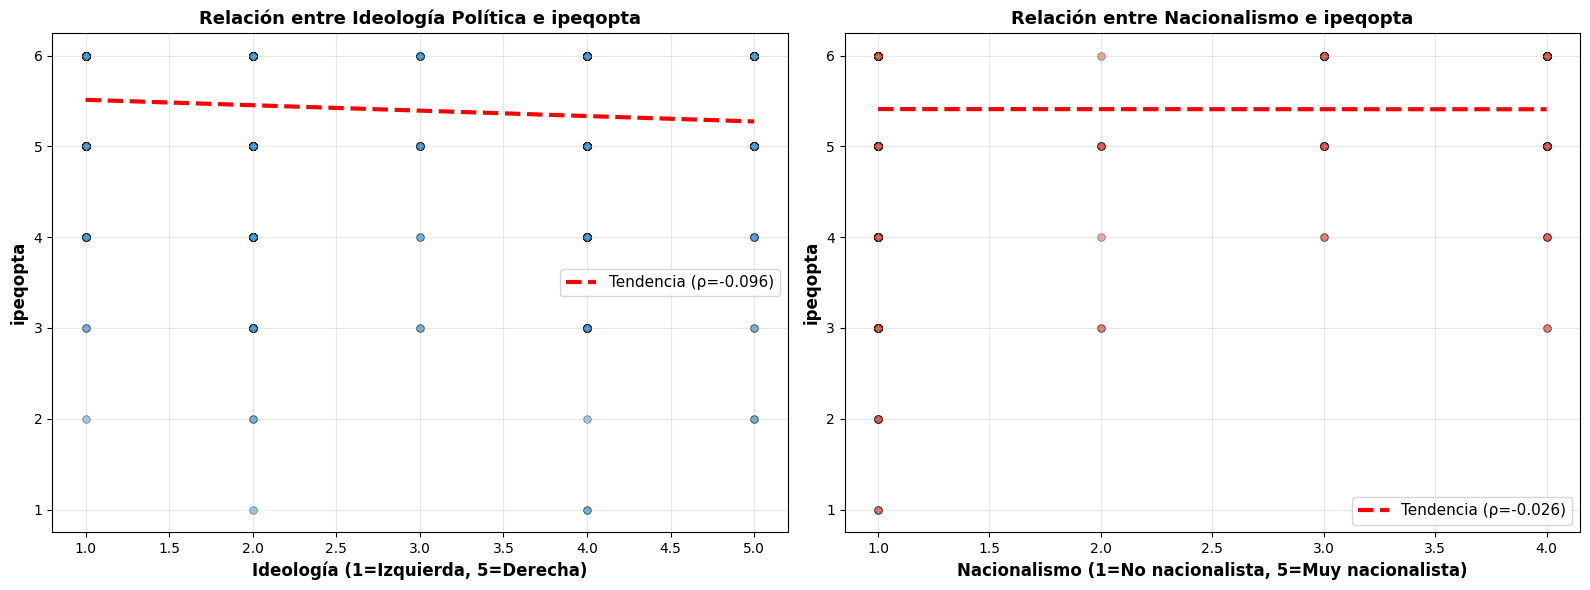

In [29]:
# Visualización: Gráficos de dispersión con líneas de tendencia
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Ideología vs ipeqopta
ax1.scatter(df_clean_ideology['ideology'], df_clean_ideology['ipeqopta'], 
           alpha=0.5, s=30, color='#3498db', edgecolors='black', linewidths=0.5)

# Línea de tendencia
z1 = np.polyfit(df_clean_ideology['ideology'], df_clean_ideology['ipeqopta'], 1)
p1 = np.poly1d(z1)
ax1.plot(df_clean_ideology['ideology'].sort_values(), 
        p1(df_clean_ideology['ideology'].sort_values()), 
        "r--", linewidth=3, label=f'Tendencia (ρ={spearman_corr_ideo:.3f})')

ax1.set_xlabel('Ideología (1=Izquierda, 5=Derecha)', fontsize=12, fontweight='bold')
ax1.set_ylabel('ipeqopta', fontsize=12, fontweight='bold')
ax1.set_title('Relación entre Ideología Política e ipeqopta', fontsize=13, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Gráfico 2: Nacionalismo vs ipeqopta
ax2.scatter(df_clean_nationalism['nationalism'], df_clean_nationalism['ipeqopta'], 
           alpha=0.5, s=30, color='#e74c3c', edgecolors='black', linewidths=0.5)

# Línea de tendencia
z2 = np.polyfit(df_clean_nationalism['nationalism'], df_clean_nationalism['ipeqopta'], 1)
p2 = np.poly1d(z2)
ax2.plot(df_clean_nationalism['nationalism'].sort_values(), 
        p2(df_clean_nationalism['nationalism'].sort_values()), 
        "r--", linewidth=3, label=f'Tendencia (ρ={spearman_corr_nat:.3f})')

ax2.set_xlabel('Nacionalismo (1=No nacionalista, 5=Muy nacionalista)', fontsize=12, fontweight='bold')
ax2.set_ylabel('ipeqopta', fontsize=12, fontweight='bold')
ax2.set_title('Relación entre Nacionalismo e ipeqopta', fontsize=13, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Variable Dependiente "eqpaybg": apoyo a la igualdad salarial

### Pregunta en la encuesta:

Using this card, in general, how bad or good is it for the strength of the economy in [country] if women and men receive equal pay for doing the same work?

0:	Very bad for the strength of the economy in [country] /
1:	1 /
2:	2 / 
3:	3 /
4:	4 /
5:	5 /
6:	Very good for the strength of the economy in [country] /
7:	Refusal* /
8:	Don't know* /
9:	No answer* /

![Captura de pantalla 2025-10-23 141539.png](<attachment:Captura de pantalla 2025-10-23 141539.png>)
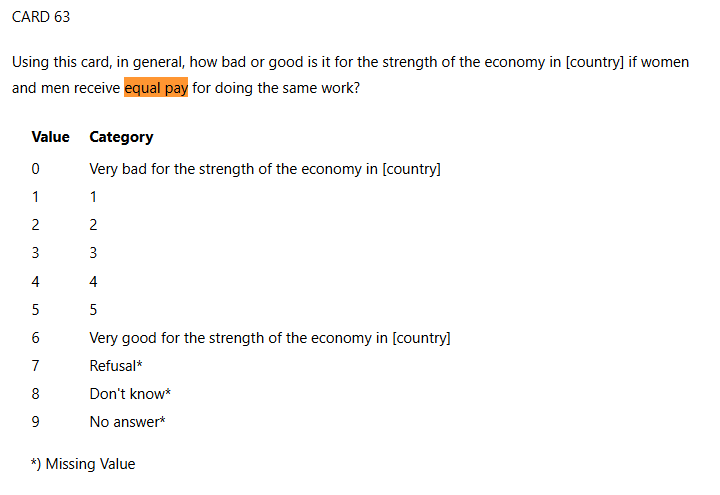

In [30]:
# Filtrar adicionalmente los valores inválidos de la variable eqpaybg (7, 8, 9)
df_clean = df_clean[~df_clean['eqpaybg'].isin([7, 8, 9])].copy()

In [31]:
# Estadísticas descriptivas de la variable eqpaybg
df_clean['eqpaybg'].describe()

count    42891.000000
mean         5.115222
std          1.211861
min          0.000000
25%          4.000000
50%          6.000000
75%          6.000000
max          6.000000
Name: eqpaybg, dtype: float64

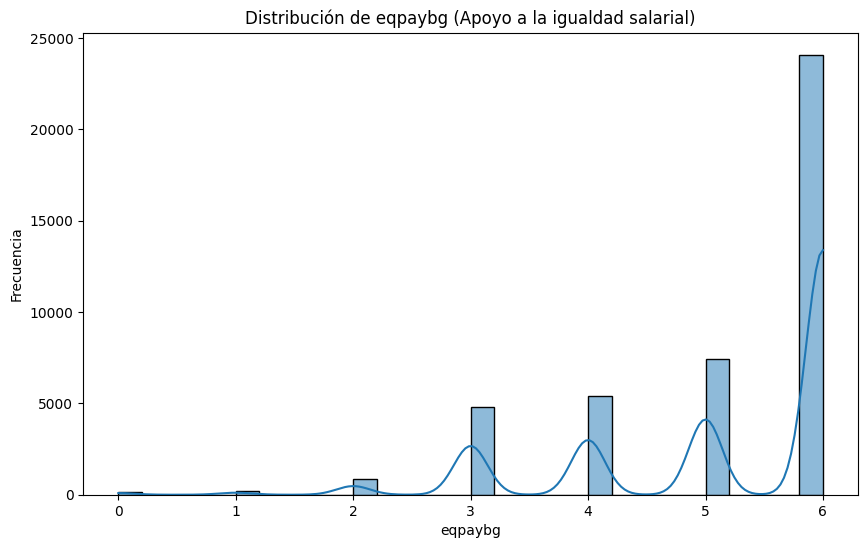

In [32]:
# Visualización de la distribución de la variable eqpaybg
plt.figure(figsize=(10,6))
sns.histplot(df_clean['eqpaybg'], bins=30, kde=True)
plt.title('Distribución de eqpaybg (Apoyo a la igualdad salarial)')
plt.xlabel('eqpaybg')
plt.ylabel('Frecuencia')
plt.show()

In [33]:
shapiro_test_pay = stats.shapiro(df_clean['eqpaybg'])
print(f'Shapiro-Wilk Test: W={shapiro_test_pay.statistic}, p-value={shapiro_test_pay.pvalue}')
if shapiro_test_pay.pvalue > 0.05:
    print(f'eqpaybg is likely normally distributed (fail to reject H0)')
else:
    print(f'eqpaybg is likely not normally distributed (reject H0)')

Shapiro-Wilk Test: W=0.741919846239955, p-value=2.0896944911803305e-118
eqpaybg is likely not normally distributed (reject H0)


C:\Users\paula\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 42891.



### Género

1= Hombre 2= Mujer

In [34]:
# Análisis de la variable eqpaybg según género. 1=Hombre, 2=Mujer
df_clean.groupby('gndr')['eqpaybg'].describe()

,count,mean,std,min,25%,50%,75%,max
gndr,,,,,,,,
1,20101.0,4.999851,1.262056,0.0,4.0,6.0,6.0,6.0
2,22790.0,5.216981,1.156309,0.0,5.0,6.0,6.0,6.0


In [35]:
# Frecuencia en las respuestas de eqpaybg por género
pd.crosstab(df_clean['eqpaybg'], df_clean['gndr'], normalize='columns') * 100

gndr,1,2
eqpaybg,,
0,0.452714,0.315928
1,0.567136,0.372971
2,2.368041,1.636683
3,13.098851,9.499781
4,13.675937,11.566477
5,18.342371,16.362440
6,51.494950,60.245722


In [36]:
# Gráfico de la frecuencia en las respuestas de eqpaybg por género
df_plot_pay = df_clean.copy()
df_plot_pay['gndr'] = df_plot_pay['gndr'].map({1: 'Hombre', 2: 'Mujer'})

fig = px.histogram(df_plot_pay, x='eqpaybg', color='gndr', barmode='group',
                   category_orders={'eqpaybg': [1, 2, 3, 4, 5]},
                   labels={'eqpaybg': 'Apoyo a la igualdad salarial', 'gndr': 'Género'},
                   title='Frecuencia de respuestas en eqpaybg por género',
                   histnorm='percent')
fig.update_layout(bargap=0.2)
fig.show()

Correlación de Spearman

In [37]:
from scipy.stats import spearmanr

# Correlación entre eqpaybg y género

# Recodificar género: Hombre=0, Mujer=1
df_clean['gndr_binary'] = df_clean['gndr'].map({1: 0, 2: 1})

# Calcular la correlación de Spearman (no paramétrica, apropiada para datos no normales)
spearman_corr_pay, spearman_pvalue_pay = spearmanr(df_clean['eqpaybg'], df_clean['gndr_binary'])

# Interpretación de la correlación entre eqpaybg y género
print("=" * 80)
print("CORRELACIÓN: EQPAYBG vs GÉNERO")
print("=" * 80)
print(f"\n📊 Coeficiente de correlación de Spearman: {spearman_corr_pay:.4f}")
print(f"📊 P-value: {spearman_pvalue_pay:.4e}\n")

print("💡 INTERPRETACIÓN:")
if spearman_corr_pay > 0:
    print(f"   ✓ Correlación POSITIVA (+{spearman_corr_pay:.4f})")
    print("   → Las MUJERES (codificadas como 1) tienen valores MÁS ALTOS de eqpaybg")
    print("   → Valores altos de eqpaybg = MAYOR apoyo a la igualdad salarial")
    print("   → CONCLUSIÓN: Las MUJERES apoyan MÁS la igualdad salarial que los HOMBRES")
elif spearman_corr_pay < 0:
    print(f"   ✓ Correlación NEGATIVA ({spearman_corr_pay:.4f})")
    print("   → Las MUJERES (codificadas como 1) tienen valores MÁS BAJOS de eqpaybg")
    print("   → Valores bajos de eqpaybg = MENOR apoyo a la igualdad salarial")
    print("   → CONCLUSIÓN: Los HOMBRES apoyan MÁS la igualdad salarial que las MUJERES")
else:
    print("   ✓ Correlación CERO - No hay diferencia significativa entre géneros")

# Magnitud
abs_corr_gender_pay = abs(spearman_corr_pay)
if abs_corr_gender_pay < 0.20:
    fuerza_gender_pay = "MUY DÉBIL"
elif abs_corr_gender_pay < 0.40:
    fuerza_gender_pay = "DÉBIL"
elif abs_corr_gender_pay < 0.60:
    fuerza_gender_pay = "MODERADA"
elif abs_corr_gender_pay < 0.80:
    fuerza_gender_pay = "FUERTE"
else:
    fuerza_gender_pay = "MUY FUERTE"

print(f"\n   📏 Fuerza de la correlación: {fuerza_gender_pay} (|ρ| = {abs_corr_gender_pay:.4f})")

# Significancia estadística
if spearman_pvalue_pay < 0.001:
    print(f"   ✅ Altamente significativa (p < 0.001)")
elif spearman_pvalue_pay < 0.05:
    print(f"   ✅ Estadísticamente significativa (p < 0.05)")
else:
    print(f"   ❌ No significativa (p >= 0.05)")
    
print("=" * 80)

CORRELACIÓN: EQPAYBG vs GÉNERO

📊 Coeficiente de correlación de Spearman: 0.0929
📊 P-value: 7.0326e-83

💡 INTERPRETACIÓN:
   ✓ Correlación POSITIVA (+0.0929)
   → Las MUJERES (codificadas como 1) tienen valores MÁS ALTOS de eqpaybg
   → Valores altos de eqpaybg = MAYOR apoyo a la igualdad salarial
   → CONCLUSIÓN: Las MUJERES apoyan MÁS la igualdad salarial que los HOMBRES

   📏 Fuerza de la correlación: MUY DÉBIL (|ρ| = 0.0929)
   ✅ Altamente significativa (p < 0.001)


### Edad

In [38]:
# Análisis de la variable eqpaybg según edad en intervalos de 10 años
min_age_pay = df_clean['agea'].min()
df_clean.groupby(pd.cut(df_clean['agea'], bins=np.arange(min_age_pay, 100, 10))).agg({'eqpaybg': ['mean', 'count']})

C:\Users\paula\AppData\Local\Temp\ipykernel_11796\2034337377.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



eqpaybg      
              mean count
agea                    
(15, 25]  5.130684  4354
(25, 35]  5.143841  5374
(35, 45]  5.140620  6642
(45, 55]  5.100464  7326
(55, 65]  5.118181  7607
(65, 75]  5.099614  6987
(75, 85]  5.080212  3765
(85, 95]  5.042895   746

In [39]:
# Frecuencia en las respuestas de eqpaybg por edad en intervalos de 10 años
pd.crosstab(df_clean['eqpaybg'], pd.cut(df_clean['agea'], bins=np.arange(min_age_pay, 100, 10)), normalize='columns') * 100

agea,"(15, 25]","(25, 35]","(35, 45]","(45, 55]","(55, 65]","(65, 75]","(75, 85]","(85, 95]"
eqpaybg,,,,,,,,
0,0.367478,0.465203,0.316170,0.341250,0.394374,0.415057,0.345286,0.536193
1,0.344511,0.465203,0.361337,0.559651,0.407519,0.400744,0.664011,1.206434
2,1.883326,2.102717,1.881963,1.965602,1.748390,2.361529,1.938911,1.340483
3,10.978411,10.029773,11.050888,11.602512,11.660313,10.948905,11.872510,11.796247
4,11.988976,12.634909,12.466125,12.912913,12.396477,12.680693,12.456839,13.672922
5,18.557648,16.728694,16.621500,16.612067,17.010648,17.890368,18.300133,18.364611
6,55.879651,57.573502,57.302017,56.006006,56.382279,55.302705,54.422311,53.083110


In [40]:
# Gráfico de la media de eqpaybg por edad en intervalos de 10 años
age_means_pay = df_clean.groupby(pd.cut(df_clean['agea'], bins=np.arange(min_age_pay, 100, 10)))['eqpaybg'].mean().reset_index()
age_means_pay.columns = ['age_group', 'eqpaybg_mean']

# Convertir los intervalos a strings para mejor visualización
age_means_pay['age_label'] = age_means_pay['age_group'].astype(str)

fig = px.line(age_means_pay, 
              x='age_label', 
              y='eqpaybg_mean',
              markers=True,
              labels={'age_label': 'Grupo de edad', 'eqpaybg_mean': 'Media de apoyo a la igualdad salarial'},
              title='Media de eqpaybg por grupo de edad')

fig.update_layout(xaxis_tickangle=-45, height=500)
fig.show()

C:\Users\paula\AppData\Local\Temp\ipykernel_11796\160369783.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Correlación de Spearman

In [41]:
# Correlación entre eqpaybg y edad

# Calcular la correlación de Spearman (no paramétrica, apropiada para datos no normales)
spearman_corr_age_pay, spearman_pvalue_age_pay = spearmanr(df_clean['eqpaybg'], df_clean['agea'])

# Interpretación de la correlación entre eqpaybg y edad
print("=" * 80)
print("CORRELACIÓN: EQPAYBG vs EDAD")
print("=" * 80)
print(f"\n📊 Coeficiente de correlación de Spearman: {spearman_corr_age_pay:.4f}")
print(f"📊 P-value: {spearman_pvalue_age_pay:.4e}\n")

print("💡 INTERPRETACIÓN:")
if spearman_corr_age_pay < 0:
    print(f"   ✓ Correlación NEGATIVA ({spearman_corr_age_pay:.4f})")
    print("   → A MENOR edad, valores MÁS ALTOS de eqpaybg")
    print("   → Valores altos de eqpaybg = MAYOR apoyo a la igualdad salarial")
    print("   → CONCLUSIÓN: Las personas MÁS JÓVENES apoyan MÁS")
    print("                  la igualdad salarial")
elif spearman_corr_age_pay > 0:
    print(f"   ✓ Correlación POSITIVA (+{spearman_corr_age_pay:.4f})")
    print("   → A MAYOR edad, valores MÁS ALTOS de eqpaybg")
    print("   → Valores altos de eqpaybg = MAYOR apoyo a la igualdad salarial")
    print("   → CONCLUSIÓN: Las personas MAYORES apoyan MÁS")
    print("                  la igualdad salarial")
else:
    print("   ✓ Correlación CERO - No hay relación lineal entre edad y eqpaybg")

# Magnitud
abs_corr_age_pay = abs(spearman_corr_age_pay)
if abs_corr_age_pay < 0.20:
    fuerza_age_pay = "MUY DÉBIL"
elif abs_corr_age_pay < 0.40:
    fuerza_age_pay = "DÉBIL"
elif abs_corr_age_pay < 0.60:
    fuerza_age_pay = "MODERADA"
elif abs_corr_age_pay < 0.80:
    fuerza_age_pay = "FUERTE"
else:
    fuerza_age_pay = "MUY FUERTE"

print(f"\n   📏 Fuerza de la correlación: {fuerza_age_pay} (|ρ| = {abs_corr_age_pay:.4f})")

# Significancia estadística
if spearman_pvalue_age_pay < 0.001:
    print(f"   ✅ Altamente significativa (p < 0.001)")
elif spearman_pvalue_age_pay < 0.05:
    print(f"   ✅ Estadísticamente significativa (p < 0.05)")
else:
    print(f"   ❌ No significativa (p >= 0.05)")

print("=" * 80)

CORRELACIÓN: EQPAYBG vs EDAD

📊 Coeficiente de correlación de Spearman: -0.0177
📊 P-value: 2.3697e-04

💡 INTERPRETACIÓN:
   ✓ Correlación NEGATIVA (-0.0177)
   → A MENOR edad, valores MÁS ALTOS de eqpaybg
   → Valores altos de eqpaybg = MAYOR apoyo a la igualdad salarial
   → CONCLUSIÓN: Las personas MÁS JÓVENES apoyan MÁS
                  la igualdad salarial

   📏 Fuerza de la correlación: MUY DÉBIL (|ρ| = 0.0177)
   ✅ Altamente significativa (p < 0.001)


### Nivel Educativo

In [42]:
# Análisis de la variable eqpaybg según nivel educativo
df_clean.groupby('education_level')['eqpaybg'].describe()

,count,mean,std,min,25%,50%,75%,max
education_level,,,,,,,,
0,342.0,4.821637,1.348530,0.0,4.0,5.0,6.0,6.0
1,2235.0,5.016555,1.302224,0.0,4.0,6.0,6.0,6.0
2,23.0,5.478261,1.162660,1.0,5.5,6.0,6.0,6.0
3,642.0,5.065421,1.202735,0.0,4.0,6.0,6.0,6.0
4,4494.0,5.022029,1.253246,0.0,4.0,6.0,6.0,6.0
5,43.0,4.720930,1.385737,2.0,3.5,5.0,6.0,6.0
6,385.0,4.909091,1.282716,0.0,4.0,5.0,6.0,6.0
7,34.0,4.352941,1.649285,1.0,3.0,4.5,6.0,6.0
8,687.0,4.885007,1.322554,0.0,4.0,5.0,6.0,6.0


In [43]:
# Gráfico de la media de eqpaybg por nivel educativo
education_means_pay = df_clean.groupby('education_level')['eqpaybg'].mean().reset_index()
education_means_pay.columns = ['education_level', 'eqpaybg_mean']

fig = px.line(education_means_pay, 
              x='education_level', 
              y='eqpaybg_mean',
              markers=True,
              labels={'education_level': 'Nivel Educativo (0=Básico, 26=Doctorado)', 
                      'eqpaybg_mean': 'Media de apoyo a la igualdad salarial'},
              title='Media de eqpaybg por nivel educativo')

fig.update_layout(height=500)
fig.show()

Correlación de Spearman

In [44]:
# Correlación entre eqpaybg y nivel educativo

# Filtrar valores válidos (sin NaN)
df_education_pay = df_clean[df_clean['education_level'].notna()].copy()

# Calcular la correlación de Spearman (no paramétrica, apropiada para datos no normales)
spearman_corr_edu_pay, spearman_pvalue_edu_pay = spearmanr(df_education_pay['eqpaybg'], df_education_pay['education_level'])

# Interpretación de la correlación entre eqpaybg y nivel educativo
print("=" * 80)
print("CORRELACIÓN: EQPAYBG vs NIVEL EDUCATIVO")
print("=" * 80)
print(f"\n📊 Coeficiente de correlación de Spearman: {spearman_corr_edu_pay:.4f}")
print(f"📊 P-value: {spearman_pvalue_edu_pay:.4e}\n")

print("💡 INTERPRETACIÓN:")
if spearman_corr_edu_pay < 0:
    print(f"   ✓ Correlación NEGATIVA ({spearman_corr_edu_pay:.4f})")
    print("   → A MENOR nivel educativo, valores MÁS ALTOS de eqpaybg")
    print("   → Valores altos de eqpaybg = MAYOR apoyo a la igualdad salarial")
    print("   → CONCLUSIÓN: Las personas con MENOR nivel educativo apoyan MÁS")
    print("                  la igualdad salarial")
elif spearman_corr_edu_pay > 0:
    print(f"   ✓ Correlación POSITIVA (+{spearman_corr_edu_pay:.4f})")
    print("   → A MAYOR nivel educativo, valores MÁS ALTOS de eqpaybg")
    print("   → Valores altos de eqpaybg = MAYOR apoyo a la igualdad salarial")
    print("   → CONCLUSIÓN: Las personas con MAYOR nivel educativo apoyan MÁS")
    print("                  la igualdad salarial")
else:
    print("   ✓ Correlación CERO - No hay relación lineal entre nivel educativo y eqpaybg")

# Magnitud
abs_corr_edu_pay = abs(spearman_corr_edu_pay)
if abs_corr_edu_pay < 0.20:
    fuerza_edu_pay = "MUY DÉBIL"
elif abs_corr_edu_pay < 0.40:
    fuerza_edu_pay = "DÉBIL"
elif abs_corr_edu_pay < 0.60:
    fuerza_edu_pay = "MODERADA"
elif abs_corr_edu_pay < 0.80:
    fuerza_edu_pay = "FUERTE"
else:
    fuerza_edu_pay = "MUY FUERTE"

print(f"\n   📏 Fuerza de la correlación: {fuerza_edu_pay} (|ρ| = {abs_corr_edu_pay:.4f})")

# Significancia estadística
if spearman_pvalue_edu_pay < 0.001:
    print(f"   ✅ Altamente significativa (p < 0.001)")
elif spearman_pvalue_edu_pay < 0.05:
    print(f"   ✅ Estadísticamente significativa (p < 0.05)")
else:
    print(f"   ❌ No significativa (p >= 0.05)")

print("=" * 80)

CORRELACIÓN: EQPAYBG vs NIVEL EDUCATIVO

📊 Coeficiente de correlación de Spearman: 0.1178
📊 P-value: 2.0191e-132

💡 INTERPRETACIÓN:
   ✓ Correlación POSITIVA (+0.1178)
   → A MAYOR nivel educativo, valores MÁS ALTOS de eqpaybg
   → Valores altos de eqpaybg = MAYOR apoyo a la igualdad salarial
   → CONCLUSIÓN: Las personas con MAYOR nivel educativo apoyan MÁS
                  la igualdad salarial

   📏 Fuerza de la correlación: MUY DÉBIL (|ρ| = 0.1178)
   ✅ Altamente significativa (p < 0.001)


### País

In [45]:
# Análisis de la variable eqpaybg según país
df_clean.groupby('cntry')['eqpaybg'].describe()

,count,mean,std,min,25%,50%,75%,max
cntry,,,,,,,,
AT,2239.0,5.126842,1.195384,0.0,5.0,6.0,6.0,6.0
BE,1541.0,5.384815,0.959845,0.0,5.0,6.0,6.0,6.0
BG,2125.0,4.979765,1.291747,0.0,4.0,6.0,6.0,6.0
CH,1328.0,5.352410,1.000027,0.0,5.0,6.0,6.0,6.0
CY,624.0,5.147436,1.168360,0.0,4.0,6.0,6.0,6.0
DE,2319.0,5.269944,1.063760,0.0,5.0,6.0,6.0,6.0
ES,1081.0,5.654024,0.822488,0.0,6.0,6.0,6.0,6.0
FI,1511.0,5.516876,0.878484,0.0,5.0,6.0,6.0,6.0
FR,1705.0,5.519648,0.901743,0.0,5.0,6.0,6.0,6.0


In [46]:
# Visualización de la variable eqpaybg por país en un mapa de Europa interactivo
country_data_pay = df_clean.groupby('cntry')['eqpaybg'].mean().reset_index()
country_data_pay.columns = ['country', 'eqpaybg_mean']

# Usar los mismos mapeos de códigos de país
country_data_pay['country_iso3'] = country_data_pay['country'].map(iso2_to_iso3)
country_data_pay['country_name'] = country_data_pay['country'].map(iso2_to_name)

# Crear mapa interactivo
fig = px.choropleth(country_data_pay, locations='country_iso3', locationmode='ISO-3', 
                    color='eqpaybg_mean', hover_name='country_name',
                    hover_data={'eqpaybg_mean': ':.2f', 'country': False, 'country_iso3': False, 'country_name': False},
                    color_continuous_scale='RdYlGn', range_color=[4, 6], scope='europe',
                    title='Apoyo a la igualdad salarial por país (eqpaybg)',
                    labels={'eqpaybg_mean': 'Media eqpaybg (0-6)'})

fig.update_layout(geo=dict(showframe=False, showcoastlines=True, projection_type='natural earth'),
                  height=600, width=900)
fig.show()

### Partido Político España

1=PP 2=PSOE 3=VOX 4=SUMAR 5=ERC 6=JuntsxCat 7=EH-Bildu 8=EAJ-PNV 9=BNG 10=CoaliciónCanaria(CC) 11=UPN 12= PACMA 50=Other 51=BlankVote 52=InvalidVote

In [47]:
# Análisis de la variable eqpaybg según partido político votado en España
df_clean.groupby('prtvtges')['eqpaybg'].describe()

,count,mean,std,min,25%,50%,75%,max
prtvtges,,,,,,,,
1.0,317.0,5.548896,0.952166,1.0,6.0,6.0,6.0,6.0
2.0,411.0,5.688564,0.758908,0.0,6.0,6.0,6.0,6.0
3.0,72.0,5.458333,1.033761,1.0,5.0,6.0,6.0,6.0
4.0,117.0,5.863248,0.506951,3.0,6.0,6.0,6.0,6.0
5.0,25.0,5.840000,0.374166,5.0,6.0,6.0,6.0,6.0
6.0,19.0,5.789474,0.418854,5.0,6.0,6.0,6.0,6.0
7.0,18.0,5.888889,0.323381,5.0,6.0,6.0,6.0,6.0
8.0,14.0,5.642857,1.081818,2.0,6.0,6.0,6.0,6.0
9.0,17.0,5.764706,0.752447,3.0,6.0,6.0,6.0,6.0


In [48]:
# Calcular media por partido
party_means_pay = df_clean.groupby('prtvtges')['eqpaybg'].mean().reset_index()
party_means_pay['party_name'] = party_means_pay['prtvtges'].map(party_names)

# Gráfico de barras
fig = px.bar(party_means_pay, 
             x='party_name', 
             y='eqpaybg',
             labels={'party_name': 'Partido Político', 'eqpaybg': 'Media de apoyo a la igualdad salarial'},
             title='Media de eqpaybg por partido político en España',
             color='eqpaybg',
             color_continuous_scale='RdYlGn',
             range_y=[4, 6])

fig.update_layout(xaxis_tickangle=-45, height=600)
fig.show()

Correlación de Spearman con Ideología política

In [49]:
# Calcular correlación de Spearman (no paramétrica)
spearman_corr_ideo_pay, spearman_pvalue_ideo_pay = spearmanr(df_clean_ideology['eqpaybg'], df_clean_ideology['ideology'])

print("=" * 80)
print("CORRELACIÓN: EQPAYBG vs IDEOLOGÍA POLÍTICA (Izquierda-Derecha)")
print("=" * 80)
print(f"\n📊 Coeficiente de correlación de Spearman: {spearman_corr_ideo_pay:.4f}")
print(f"📊 P-value: {spearman_pvalue_ideo_pay:.4e}\n")

print("💡 INTERPRETACIÓN:")
if spearman_corr_ideo_pay > 0:
    print(f"   ✓ Correlación POSITIVA (+{spearman_corr_ideo_pay:.4f})")
    print("   → A más DERECHA, valores MÁS ALTOS de eqpaybg")
    print("   → Valores altos de eqpaybg = MÁS apoyo a la igualdad salarial")
    print("   → CONCLUSIÓN: Los votantes de DERECHA apoyan MÁS la igualdad salarial")
elif spearman_corr_ideo_pay < 0:
    print(f"   ✓ Correlación NEGATIVA ({spearman_corr_ideo_pay:.4f})")
    print("   → A más IZQUIERDA, valores MÁS ALTOS de eqpaybg")
    print("   → Valores altos de eqpaybg = MAYOR apoyo a la igualdad salarial")
    print("   → CONCLUSIÓN: Los votantes de IZQUIERDA apoyan MÁS la igualdad salarial")
else:
    print("   ✓ Correlación CERO")
    print("   → No hay relación lineal entre ideología y eqpaybg")

# Magnitud
abs_corr_ideo_pay = abs(spearman_corr_ideo_pay)
if abs_corr_ideo_pay < 0.20:
    fuerza_ideo_pay = "MUY DÉBIL"
elif abs_corr_ideo_pay < 0.40:
    fuerza_ideo_pay = "DÉBIL"
elif abs_corr_ideo_pay < 0.60:
    fuerza_ideo_pay = "MODERADA"
elif abs_corr_ideo_pay < 0.80:
    fuerza_ideo_pay = "FUERTE"
else:
    fuerza_ideo_pay = "MUY FUERTE"

print(f"\n   📏 Fuerza de la correlación: {fuerza_ideo_pay} (|ρ| = {abs_corr_ideo_pay:.4f})")

# Significancia estadística
if spearman_pvalue_ideo_pay < 0.001:
    print(f"   ✅ Altamente significativa (p < 0.001)")
elif spearman_pvalue_ideo_pay < 0.05:
    print(f"   ✅ Estadísticamente significativa (p < 0.05)")
else:
    print(f"   ❌ No significativa (p >= 0.05)")

print("=" * 80)

CORRELACIÓN: EQPAYBG vs IDEOLOGÍA POLÍTICA (Izquierda-Derecha)

📊 Coeficiente de correlación de Spearman: -0.1198
📊 P-value: 1.1241e-04

💡 INTERPRETACIÓN:
   ✓ Correlación NEGATIVA (-0.1198)
   → A más IZQUIERDA, valores MÁS ALTOS de eqpaybg
   → Valores altos de eqpaybg = MAYOR apoyo a la igualdad salarial
   → CONCLUSIÓN: Los votantes de IZQUIERDA apoyan MÁS la igualdad salarial

   📏 Fuerza de la correlación: MUY DÉBIL (|ρ| = 0.1198)
   ✅ Altamente significativa (p < 0.001)


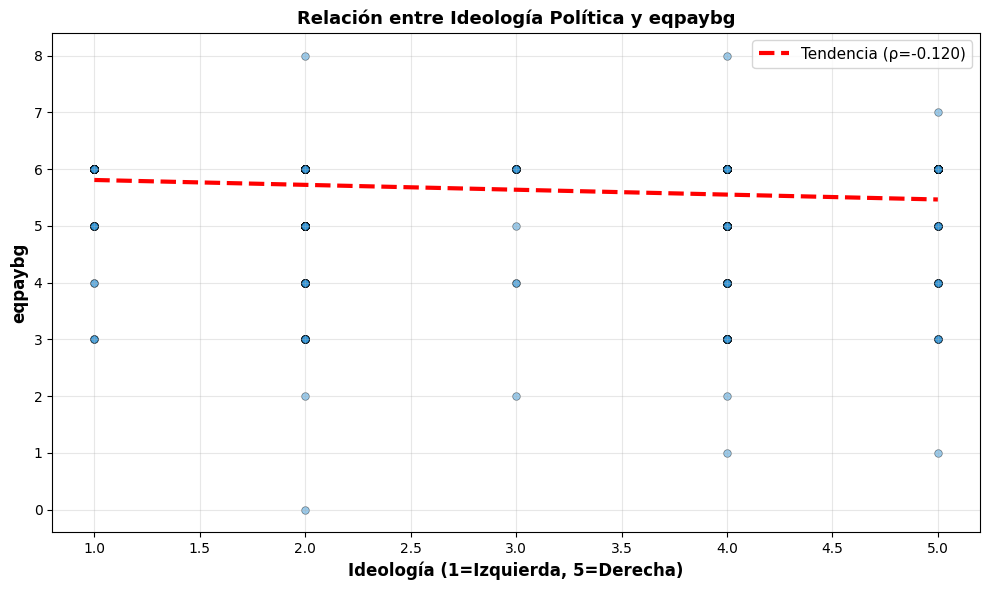

In [50]:
# Visualización: Gráfico de dispersión con línea de tendencia (eqpaybg vs ideología)
plt.figure(figsize=(10, 6))

plt.scatter(df_clean_ideology['ideology'], df_clean_ideology['eqpaybg'], 
           alpha=0.5, s=30, color='#3498db', edgecolors='black', linewidths=0.5)

# Línea de tendencia
z = np.polyfit(df_clean_ideology['ideology'], df_clean_ideology['eqpaybg'], 1)
p = np.poly1d(z)
plt.plot(df_clean_ideology['ideology'].sort_values(), 
        p(df_clean_ideology['ideology'].sort_values()), 
        "r--", linewidth=3, label=f'Tendencia (ρ={spearman_corr_ideo_pay:.3f})')

plt.xlabel('Ideología (1=Izquierda, 5=Derecha)', fontsize=12, fontweight='bold')
plt.ylabel('eqpaybg', fontsize=12, fontweight='bold')
plt.title('Relación entre Ideología Política y eqpaybg', fontsize=13, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Variable Dependiente "polintr": interés en la política

### Pregunta en la encuesta:

How interested would you say you are in politics - are you...

1:	Very interested /
2:	Quite interested /
3:	Hardly interested /
4:	Not at all interested /
7:	Refusal* /
8:	Don't know* /
9:	No answer* 


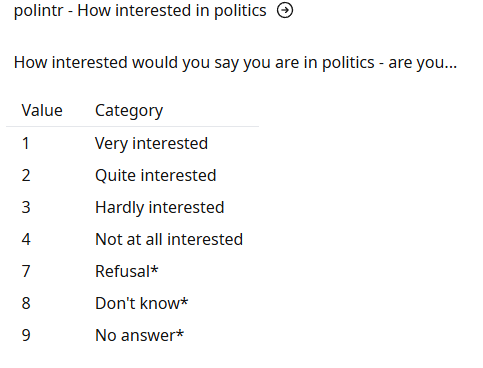

In [51]:
# Filtrar adicionalmente los valores inválidos de la variable polintr (7, 8, 9)
df_clean = df_clean[~df_clean['polintr'].isin([7, 8, 9])].copy()

# Invertir la escala de polintr para que sea más intuitiva:
# Original: 1 (muy interesado) a 4 (no interesado en absoluto)
# Nueva: 1 (no interesado en absoluto) a 4 (muy interesado)
df_clean['polintr'] = df_clean['polintr'].max() + 1 - df_clean['polintr']

In [52]:
# Estadísticas descriptivas de la variable polintr
df_clean['polintr'].describe()

count    42837.00000
mean         2.36912
std          0.93419
min          1.00000
25%          2.00000
50%          2.00000
75%          3.00000
max          4.00000
Name: polintr, dtype: float64

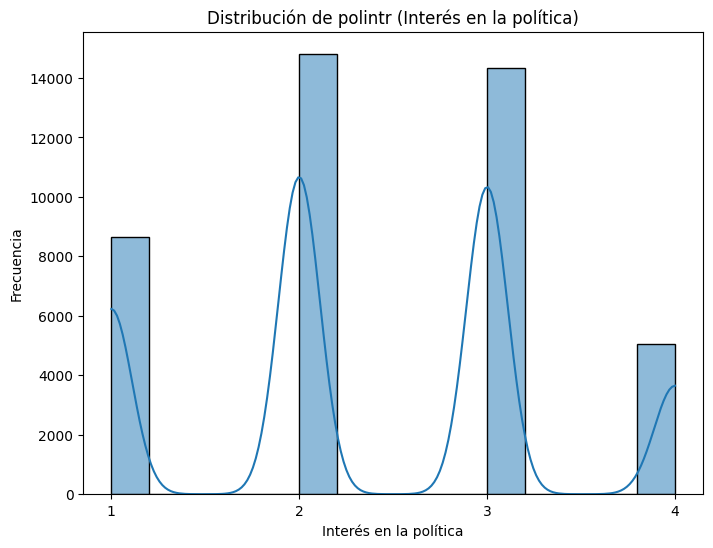

In [53]:
# Visualización de la distribución de la variable polintr
plt.figure(figsize=(8,6))
sns.histplot(df_clean['polintr'], bins=15, kde=True)
plt.title('Distribución de polintr (Interés en la política)')
plt.xlabel('Interés en la política')
plt.xticks([1, 2, 3, 4])
plt.ylabel('Frecuencia')
plt.show()

In [54]:
# Test de normalidad Shapiro-Wilk para la variable polintr
shapiro_test_polintr = stats.shapiro(df_clean['polintr'])
print(f'Shapiro-Wilk Test: W={shapiro_test_polintr.statistic}, p-value={shapiro_test_polintr.pvalue}')
if shapiro_test_polintr.pvalue > 0.05:
    print(f'polintr is likely normally distributed (fail to reject H0)')
else:
    print(f'polintr is likely not normally distributed (reject H0)')

Shapiro-Wilk Test: W=0.878179855152271, p-value=1.946838979742066e-98
polintr is likely not normally distributed (reject H0)


C:\Users\paula\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 42837.



### Género

1= Hombre 2= Mujer

In [55]:
# Análisis de la variable polintr según género. 1=Hombre, 2=Mujer
df_clean.groupby('gndr')['polintr'].describe()

,count,mean,std,min,25%,50%,75%,max
gndr,,,,,,,,
1,20074.0,2.530587,0.938388,1.0,2.0,3.0,3.0,4.0
2,22763.0,2.226728,0.906945,1.0,2.0,2.0,3.0,4.0


In [56]:
# Frecuencia en las respuestas de polintr por género
pd.crosstab(df_clean['polintr'], df_clean['gndr'], normalize='columns') * 100

gndr,1,2
polintr,,
1,15.891203,23.959935
2,30.840889,37.806967
3,37.585932,29.833502
4,15.681977,8.399596


In [57]:
# Gráfico de la frecuencia en las respuestas de polintr por género
df_plot_polintr = df_clean.copy()
df_plot_polintr['gndr'] = df_plot_polintr['gndr'].map({1: 'Hombre', 2: 'Mujer'})

fig = px.histogram(df_plot_polintr, x='polintr', color='gndr', barmode='group',
                   category_orders={'polintr': [1, 2, 3, 4]},
                   labels={'polintr': 'Interés en la política', 'gndr': 'Género'},
                   title='Frecuencia de respuestas en polintr por género',
                   histnorm='percent')
fig.update_layout(bargap=0.2)
fig.show()

Correlación de Spearman

In [58]:
from scipy.stats import spearmanr

# Correlación entre polintr y género

# Recodificar género: Hombre=0, Mujer=1
df_clean['gndr_binary'] = df_clean['gndr'].map({1: 0, 2: 1})

# Calcular la correlación de Spearman (no paramétrica, apropiada para datos no normales)
spearman_corr_polintr, spearman_pvalue_polintr = spearmanr(df_clean['polintr'], df_clean['gndr_binary'])

# Interpretación de la correlación entre polintr y género
print("=" * 80)
print("CORRELACIÓN: POLINTR vs GÉNERO")
print("=" * 80)
print(f"\n📊 Coeficiente de correlación de Spearman: {spearman_corr_polintr:.4f}")
print(f"📊 P-value: {spearman_pvalue_polintr:.4e}\n")

print("💡 INTERPRETACIÓN:")
if spearman_corr_polintr < 0:
    print(f"   ✓ Correlación NEGATIVA ({spearman_corr_polintr:.4f})")
    print("   → Las MUJERES (codificadas como 1) tienen valores MÁS BAJOS de polintr")
    print("   → Valores bajos de polintr = MENOR interés en la política")
    print("   → CONCLUSIÓN: Las MUJERES tienen MENOS interés en la política")
elif spearman_corr_polintr > 0:
    print(f"   ✓ Correlación POSITIVA (+{spearman_corr_polintr:.4f})")
    print("   → Las MUJERES (codificadas como 1) tienen valores MÁS ALTOS de polintr")
    print("   → Valores altos de polintr = MAYOR interés en la política")
    print("   → CONCLUSIÓN: Las MUJERES tienen MÁS interés en la política")
else:
    print("   ✓ Correlación CERO - No hay diferencia significativa entre géneros")

# Magnitud
abs_corr_gender_polintr = abs(spearman_corr_polintr)
if abs_corr_gender_polintr < 0.20:
    fuerza_gender_polintr = "MUY DÉBIL"
elif abs_corr_gender_polintr < 0.40:
    fuerza_gender_polintr = "DÉBIL"
elif abs_corr_gender_polintr < 0.60:
    fuerza_gender_polintr = "MODERADA"
elif abs_corr_gender_polintr < 0.80:
    fuerza_gender_polintr = "FUERTE"
else:
    fuerza_gender_polintr = "MUY FUERTE"

print(f"\n   📏 Fuerza de la correlación: {fuerza_gender_polintr} (|ρ| = {abs_corr_gender_polintr:.4f})")

# Significancia estadística
if spearman_pvalue_polintr < 0.001:
    print(f"   ✅ Altamente significativa (p < 0.001)")
elif spearman_pvalue_polintr < 0.05:
    print(f"   ✅ Estadísticamente significativa (p < 0.05)")
else:
    print(f"   ❌ No significativa (p >= 0.05)")
    
print("=" * 80)

CORRELACIÓN: POLINTR vs GÉNERO

📊 Coeficiente de correlación de Spearman: -0.1624
📊 P-value: 5.9883e-251

💡 INTERPRETACIÓN:
   ✓ Correlación NEGATIVA (-0.1624)
   → Las MUJERES (codificadas como 1) tienen valores MÁS BAJOS de polintr
   → Valores bajos de polintr = MENOR interés en la política
   → CONCLUSIÓN: Las MUJERES tienen MENOS interés en la política

   📏 Fuerza de la correlación: MUY DÉBIL (|ρ| = 0.1624)
   ✅ Altamente significativa (p < 0.001)


### Edad

In [59]:
# Análisis de la variable polintr según edad en intervalos de 10 años
min_age_polintr = df_clean['agea'].min()
df_clean.groupby(pd.cut(df_clean['agea'], bins=np.arange(min_age_polintr, 100, 10))).agg({'polintr': ['mean', 'count']})

C:\Users\paula\AppData\Local\Temp\ipykernel_11796\1201393920.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



polintr      
              mean count
agea                    
(15, 25]  2.055172  4350
(25, 35]  2.246412  5365
(35, 45]  2.306707  6635
(45, 55]  2.388707  7314
(55, 65]  2.471192  7602
(65, 75]  2.535407  6976
(75, 85]  2.491489  3760
(85, 95]  2.307383   745

In [60]:
# Frecuencia en las respuestas de polintr por edad en intervalos de 10 años
pd.crosstab(df_clean['polintr'], pd.cut(df_clean['agea'], bins=np.arange(min_age_polintr, 100, 10)), normalize='columns') * 100

agea,"(15, 25]","(25, 35]","(35, 45]","(45, 55]","(55, 65]","(65, 75]","(75, 85]","(85, 95]"
polintr,,,,,,,,
1,30.390805,22.945014,20.994725,18.348373,16.535122,16.040711,19.867021,26.308725
2,39.609195,38.564772,36.819894,35.616626,33.714812,30.217890,27.260638,29.530201
3,24.091954,29.394222,32.705350,34.850971,35.845830,37.901376,36.728723,31.275168
4,5.908046,9.095993,9.480030,11.184031,13.904236,15.840023,16.143617,12.885906


In [61]:
# Gráfico de la media de polintr por edad en intervalos de 10 años
age_means_polintr = df_clean.groupby(pd.cut(df_clean['agea'], bins=np.arange(min_age_polintr, 100, 10)))['polintr'].mean().reset_index()
age_means_polintr.columns = ['age_group', 'polintr_mean']

# Convertir los intervalos a strings para mejor visualización
age_means_polintr['age_label'] = age_means_polintr['age_group'].astype(str)

fig = px.line(age_means_polintr, 
              x='age_label', 
              y='polintr_mean',
              markers=True,
              labels={'age_label': 'Grupo de edad', 'polintr_mean': 'Media de interés en la política'},
              title='Media de polintr por grupo de edad')

fig.update_layout(xaxis_tickangle=-45, height=500)
fig.show()

C:\Users\paula\AppData\Local\Temp\ipykernel_11796\2291185819.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Correlación de Spearman

In [62]:
# Correlación entre polintr y edad

# Calcular la correlación de Spearman (no paramétrica, apropiada para datos no normales)
spearman_corr_age_polintr, spearman_pvalue_age_polintr = spearmanr(df_clean['polintr'], df_clean['agea'])

# Interpretación de la correlación entre polintr y edad
print("=" * 80)
print("CORRELACIÓN: POLINTR vs EDAD")
print("=" * 80)
print(f"\n📊 Coeficiente de correlación de Spearman: {spearman_corr_age_polintr:.4f}")
print(f"📊 P-value: {spearman_pvalue_age_polintr:.4e}\n")

print("💡 INTERPRETACIÓN:")
if spearman_corr_age_polintr < 0:
    print(f"   ✓ Correlación NEGATIVA ({spearman_corr_age_polintr:.4f})")
    print("   → A MENOR edad, valores MÁS ALTOS de polintr")
    print("   → Valores altos de polintr = MAYOR interés en la política")
    print("   → CONCLUSIÓN: Las personas MÁS JÓVENES tienen MÁS interés")
    print("                  en la política")
elif spearman_corr_age_polintr > 0:
    print(f"   ✓ Correlación POSITIVA (+{spearman_corr_age_polintr:.4f})")
    print("   → A MAYOR edad, valores MÁS ALTOS de polintr")
    print("   → Valores altos de polintr = MAYOR interés en la política")
    print("   → CONCLUSIÓN: Las personas MAYORES tienen MÁS interés")
    print("                  en la política")
else:
    print("   ✓ Correlación CERO - No hay relación lineal entre edad y polintr")

# Magnitud
abs_corr_age_polintr = abs(spearman_corr_age_polintr)
if abs_corr_age_polintr < 0.20:
    fuerza_age_polintr = "MUY DÉBIL"
elif abs_corr_age_polintr < 0.40:
    fuerza_age_polintr = "DÉBIL"
elif abs_corr_age_polintr < 0.60:
    fuerza_age_polintr = "MODERADA"
elif abs_corr_age_polintr < 0.80:
    fuerza_age_polintr = "FUERTE"
else:
    fuerza_age_polintr = "MUY FUERTE"

print(f"\n   📏 Fuerza de la correlación: {fuerza_age_polintr} (|ρ| = {abs_corr_age_polintr:.4f})")

# Significancia estadística
if spearman_pvalue_age_polintr < 0.001:
    print(f"   ✅ Altamente significativa (p < 0.001)")
elif spearman_pvalue_age_polintr < 0.05:
    print(f"   ✅ Estadísticamente significativa (p < 0.05)")
else:
    print(f"   ❌ No significativa (p >= 0.05)")

print("=" * 80)

CORRELACIÓN: POLINTR vs EDAD

📊 Coeficiente de correlación de Spearman: 0.1403
📊 P-value: 3.0110e-187

💡 INTERPRETACIÓN:
   ✓ Correlación POSITIVA (+0.1403)
   → A MAYOR edad, valores MÁS ALTOS de polintr
   → Valores altos de polintr = MAYOR interés en la política
   → CONCLUSIÓN: Las personas MAYORES tienen MÁS interés
                  en la política

   📏 Fuerza de la correlación: MUY DÉBIL (|ρ| = 0.1403)
   ✅ Altamente significativa (p < 0.001)


### Nivel Educativo

In [63]:
# Análisis de la variable polintr según nivel educativo
df_clean.groupby('education_level')['polintr'].describe()

,count,mean,std,min,25%,50%,75%,max
education_level,,,,,,,,
0,341.0,1.721408,0.895304,1.0,1.0,1.0,2.0,4.0
1,2235.0,1.921700,0.907863,1.0,1.0,2.0,3.0,4.0
2,23.0,2.304348,0.822125,1.0,2.0,2.0,3.0,4.0
3,642.0,2.341121,0.878140,1.0,2.0,2.0,3.0,4.0
4,4486.0,2.039010,0.893202,1.0,1.0,2.0,3.0,4.0
5,43.0,1.953488,0.843843,1.0,1.0,2.0,3.0,4.0
6,385.0,1.955844,0.924563,1.0,1.0,2.0,3.0,4.0
7,34.0,2.235294,0.889631,1.0,2.0,2.0,3.0,4.0
8,681.0,2.227606,0.869179,1.0,2.0,2.0,3.0,4.0


In [64]:
# Gráfico de la media de polintr por nivel educativo
education_means_polintr = df_clean.groupby('education_level')['polintr'].mean().reset_index()
education_means_polintr.columns = ['education_level', 'polintr_mean']

fig = px.line(education_means_polintr, 
              x='education_level', 
              y='polintr_mean',
              markers=True,
              labels={'education_level': 'Nivel Educativo (0=Básico, 26=Doctorado)', 
                      'polintr_mean': 'Media de interés en la política'},
              title='Media de polintr por nivel educativo')

fig.update_layout(height=500)
fig.show()

Correlación de Spearman

In [65]:
# Correlación entre polintr y nivel educativo

# Filtrar valores válidos (sin NaN)
df_education_polintr = df_clean[df_clean['education_level'].notna()].copy()

# Calcular la correlación de Spearman (no paramétrica, apropiada para datos no normales)
spearman_corr_edu_polintr, spearman_pvalue_edu_polintr = spearmanr(df_education_polintr['polintr'], df_education_polintr['education_level'])

# Interpretación de la correlación entre polintr y nivel educativo
print("=" * 80)
print("CORRELACIÓN: POLINTR vs NIVEL EDUCATIVO")
print("=" * 80)
print(f"\n📊 Coeficiente de correlación de Spearman: {spearman_corr_edu_polintr:.4f}")
print(f"📊 P-value: {spearman_pvalue_edu_polintr:.4e}\n")

print("💡 INTERPRETACIÓN:")
if spearman_corr_edu_polintr < 0:
    print(f"   ✓ Correlación NEGATIVA ({spearman_corr_edu_polintr:.4f})")
    print("   → A MENOR nivel educativo, valores MÁS ALTOS de polintr")
    print("   → Valores altos de polintr = MAYOR interés en la política")
    print("   → CONCLUSIÓN: Las personas con MENOR nivel educativo tienen MÁS")
    print("                  interés en la política")
elif spearman_corr_edu_polintr > 0:
    print(f"   ✓ Correlación POSITIVA (+{spearman_corr_edu_polintr:.4f})")
    print("   → A MAYOR nivel educativo, valores MÁS ALTOS de polintr")
    print("   → Valores altos de polintr = MAYOR interés en la política")
    print("   → CONCLUSIÓN: Las personas con MAYOR nivel educativo tienen MÁS")
    print("                  interés en la política")
else:
    print("   ✓ Correlación CERO - No hay relación lineal entre nivel educativo y polintr")

# Magnitud
abs_corr_edu_polintr = abs(spearman_corr_edu_polintr)
if abs_corr_edu_polintr < 0.20:
    fuerza_edu_polintr = "MUY DÉBIL"
elif abs_corr_edu_polintr < 0.40:
    fuerza_edu_polintr = "DÉBIL"
elif abs_corr_edu_polintr < 0.60:
    fuerza_edu_polintr = "MODERADA"
elif abs_corr_edu_polintr < 0.80:
    fuerza_edu_polintr = "FUERTE"
else:
    fuerza_edu_polintr = "MUY FUERTE"

print(f"\n   📏 Fuerza de la correlación: {fuerza_edu_polintr} (|ρ| = {abs_corr_edu_polintr:.4f})")

# Significancia estadística
if spearman_pvalue_edu_polintr < 0.001:
    print(f"   ✅ Altamente significativa (p < 0.001)")
elif spearman_pvalue_edu_polintr < 0.05:
    print(f"   ✅ Estadísticamente significativa (p < 0.05)")
else:
    print(f"   ❌ No significativa (p >= 0.05)")

print("=" * 80)

CORRELACIÓN: POLINTR vs NIVEL EDUCATIVO

📊 Coeficiente de correlación de Spearman: 0.2662
📊 P-value: 0.0000e+00

💡 INTERPRETACIÓN:
   ✓ Correlación POSITIVA (+0.2662)
   → A MAYOR nivel educativo, valores MÁS ALTOS de polintr
   → Valores altos de polintr = MAYOR interés en la política
   → CONCLUSIÓN: Las personas con MAYOR nivel educativo tienen MÁS
                  interés en la política

   📏 Fuerza de la correlación: DÉBIL (|ρ| = 0.2662)
   ✅ Altamente significativa (p < 0.001)


### País

In [66]:
# Análisis de la variable polintr según país
df_clean.groupby('cntry')['polintr'].describe()

,count,mean,std,min,25%,50%,75%,max
cntry,,,,,,,,
AT,2239.0,2.581510,0.850504,1.0,2.0,3.0,3.0,4.0
BE,1541.0,2.458793,0.937887,1.0,2.0,2.0,3.0,4.0
BG,2122.0,2.188973,0.902932,1.0,1.0,2.0,3.0,4.0
CH,1328.0,2.645331,0.915393,1.0,2.0,3.0,3.0,4.0
CY,624.0,2.089744,0.955658,1.0,1.0,2.0,3.0,4.0
DE,2319.0,2.858129,0.876381,1.0,2.0,3.0,4.0,4.0
ES,1080.0,2.402778,0.980718,1.0,2.0,2.0,3.0,4.0
FI,1510.0,2.797351,0.769700,1.0,2.0,3.0,3.0,4.0
FR,1704.0,2.371479,0.969849,1.0,2.0,2.0,3.0,4.0


In [67]:
# Visualización de la variable polintr por país en un mapa de Europa interactivo
country_data_polintr = df_clean.groupby('cntry')['polintr'].mean().reset_index()
country_data_polintr.columns = ['country', 'polintr_mean']

# Usar los mismos mapeos de códigos de país
country_data_polintr['country_iso3'] = country_data_polintr['country'].map(iso2_to_iso3)
country_data_polintr['country_name'] = country_data_polintr['country'].map(iso2_to_name)

# Crear mapa interactivo
fig = px.choropleth(country_data_polintr, locations='country_iso3', locationmode='ISO-3', 
                    color='polintr_mean', hover_name='country_name',
                    hover_data={'polintr_mean': ':.2f', 'country': False, 'country_iso3': False, 'country_name': False},
                    color_continuous_scale='RdYlGn', range_color=[1.5, 3], scope='europe',
                    title='Interés en la política por país (polintr)',
                    labels={'polintr_mean': 'Media polintr (1-4)'})

fig.update_layout(geo=dict(showframe=False, showcoastlines=True, projection_type='natural earth'),
                  height=600, width=900)
fig.show()

### Partido Político España

1=PP 2=PSOE 3=VOX 4=SUMAR 5=ERC 6=JuntsxCat 7=EH-Bildu 8=EAJ-PNV 9=BNG 10=CoaliciónCanaria(CC) 11=UPN 12= PACMA 50=Other 51=BlankVote 52=InvalidVote

In [68]:
# Análisis de la variable polintr según partido político votado en España
df_clean.groupby('prtvtges')['polintr'].describe()

,count,mean,std,min,25%,50%,75%,max
prtvtges,,,,,,,,
1.0,317.0,2.318612,0.946045,1.0,2.0,2.0,3.0,4.0
2.0,411.0,2.406326,0.989140,1.0,2.0,2.0,3.0,4.0
3.0,72.0,2.305556,1.043273,1.0,1.0,2.0,3.0,4.0
4.0,117.0,2.777778,0.956927,1.0,2.0,3.0,4.0,4.0
5.0,24.0,2.583333,0.829702,1.0,2.0,3.0,3.0,4.0
6.0,19.0,2.947368,0.779864,2.0,2.0,3.0,3.5,4.0
7.0,18.0,2.611111,0.978528,1.0,2.0,3.0,3.0,4.0
8.0,14.0,2.714286,0.825420,2.0,2.0,2.5,3.0,4.0
9.0,17.0,2.235294,0.970143,1.0,2.0,2.0,3.0,4.0


In [69]:
# Calcular media por partido
party_means_polintr = df_clean.groupby('prtvtges')['polintr'].mean().reset_index()
party_means_polintr['party_name'] = party_means_polintr['prtvtges'].map(party_names)

# Gráfico de barras
fig = px.bar(party_means_polintr, 
             x='party_name', 
             y='polintr',
             labels={'party_name': 'Partido Político', 'polintr': 'Media de interés en la política'},
             title='Media de polintr por partido político en España',
             color='polintr',
             color_continuous_scale='RdYlGn',
             range_y=[1, 4])

fig.update_layout(xaxis_tickangle=-45, height=500)
fig.show()

Correlación de Spearman con Ideología y Nacionalismo

In [70]:
from scipy.stats import spearmanr

# CORRELACIÓN 1: Entre polintr e ideología política (izquierda-derecha)
# Filtrar datos válidos (sin NaN)
df_clean_ideology_polintr = df_clean[df_clean['ideology'].notna()].copy()

# Calcular correlación de Spearman (no paramétrica)
spearman_corr_ideo_polintr, spearman_pvalue_ideo_polintr = spearmanr(df_clean_ideology_polintr['polintr'], df_clean_ideology_polintr['ideology'])

print("=" * 80)
print("CORRELACIÓN: POLINTR vs IDEOLOGÍA POLÍTICA (Izquierda-Derecha)")
print("=" * 80)
print(f"\n📊 Coeficiente de correlación de Spearman: {spearman_corr_ideo_polintr:.4f}")
print(f"📊 P-value: {spearman_pvalue_ideo_polintr:.4e}\n")

print("💡 INTERPRETACIÓN:")
if spearman_corr_ideo_polintr > 0:
    print(f"   ✓ Correlación POSITIVA (+{spearman_corr_ideo_polintr:.4f})")
    print("   → A más DERECHA, valores MÁS ALTOS de polintr")
    print("   → Valores altos de polintr = MAYOR interés en la política")
    print("   → CONCLUSIÓN: Los votantes de DERECHA tienen MÁS")
    print("                  interés en la política")
elif spearman_corr_ideo_polintr < 0:
    print(f"   ✓ Correlación NEGATIVA ({spearman_corr_ideo_polintr:.4f})")
    print("   → A más IZQUIERDA, valores MÁS ALTOS de polintr")
    print("   → Valores altos de polintr = MAYOR interés en la política")
    print("   → CONCLUSIÓN: Los votantes de IZQUIERDA tienen MÁS")
    print("                  interés en la política")
else:
    print("   ✓ Correlación CERO")
    print("   → No hay relación lineal entre ideología y polintr")

# Magnitud
abs_corr_ideo_polintr = abs(spearman_corr_ideo_polintr)
if abs_corr_ideo_polintr < 0.20:
    fuerza_ideo_polintr = "MUY DÉBIL"
elif abs_corr_ideo_polintr < 0.40:
    fuerza_ideo_polintr = "DÉBIL"
elif abs_corr_ideo_polintr < 0.60:
    fuerza_ideo_polintr = "MODERADA"
elif abs_corr_ideo_polintr < 0.80:
    fuerza_ideo_polintr = "FUERTE"
else:
    fuerza_ideo_polintr = "MUY FUERTE"

print(f"\n   📏 Fuerza de la correlación: {fuerza_ideo_polintr} (|r| = {abs_corr_ideo_polintr:.4f})")

# Significancia estadística
if spearman_pvalue_ideo_polintr < 0.001:
    print(f"   ✅ Altamente significativa (p < 0.001)")
elif spearman_pvalue_ideo_polintr < 0.05:
    print(f"   ✅ Estadísticamente significativa (p < 0.05)")
else:
    print(f"   ❌ No significativa (p >= 0.05)")

print("=" * 80)

CORRELACIÓN: POLINTR vs IDEOLOGÍA POLÍTICA (Izquierda-Derecha)

📊 Coeficiente de correlación de Spearman: -0.0991
📊 P-value: 1.4423e-03

💡 INTERPRETACIÓN:
   ✓ Correlación NEGATIVA (-0.0991)
   → A más IZQUIERDA, valores MÁS ALTOS de polintr
   → Valores altos de polintr = MAYOR interés en la política
   → CONCLUSIÓN: Los votantes de IZQUIERDA tienen MÁS
                  interés en la política

   📏 Fuerza de la correlación: MUY DÉBIL (|r| = 0.0991)
   ✅ Estadísticamente significativa (p < 0.05)


In [71]:
# CORRELACIÓN 2: Entre polintr y nacionalismo
# Filtrar datos válidos (sin NaN)
df_clean_nationalism_polintr = df_clean[df_clean['nationalism'].notna()].copy()

# Calcular correlación de Spearman (no paramétrica)
spearman_corr_nat_polintr, spearman_pvalue_nat_polintr = spearmanr(df_clean_nationalism_polintr['polintr'], df_clean_nationalism_polintr['nationalism'])

print("=" * 80)
print("CORRELACIÓN: POLINTR vs NACIONALISMO")
print("=" * 80)
print(f"\n📊 Coeficiente de correlación de Spearman: {spearman_corr_nat_polintr:.4f}")
print(f"📊 P-value: {spearman_pvalue_nat_polintr:.4e}\n")

print("💡 INTERPRETACIÓN:")
if spearman_corr_nat_polintr > 0:
    print(f"   ✓ Correlación POSITIVA (+{spearman_corr_nat_polintr:.4f})")
    print("   → A más NACIONALISTA, valores MÁS ALTOS de polintr")
    print("   → Valores altos de polintr = MAYOR interés en la política")
    print("   → CONCLUSIÓN: Los votantes de partidos MÁS NACIONALISTAS")
    print("                  tienen MÁS interés en la política")
elif spearman_corr_nat_polintr < 0:
    print(f"   ✓ Correlación NEGATIVA ({spearman_corr_nat_polintr:.4f})")
    print("   → A más NACIONALISTA, valores MÁS BAJOS de polintr")
    print("   → Valores bajos de polintr = MENOR interés en la política")
    print("   → CONCLUSIÓN: Los votantes de partidos MÁS NACIONALISTAS")
    print("                  tienen MENOS interés en la política")
else:
    print("   ✓ Correlación CERO")
    print("   → No hay relación lineal entre nacionalismo y polintr")

# Magnitud
abs_corr_nat_polintr = abs(spearman_corr_nat_polintr)
if abs_corr_nat_polintr < 0.20:
    fuerza_nat_polintr = "MUY DÉBIL"
elif abs_corr_nat_polintr < 0.40:
    fuerza_nat_polintr = "DÉBIL"
elif abs_corr_nat_polintr < 0.60:
    fuerza_nat_polintr = "MODERADA"
elif abs_corr_nat_polintr < 0.80:
    fuerza_nat_polintr = "FUERTE"
else:
    fuerza_nat_polintr = "MUY FUERTE"

print(f"\n   📏 Fuerza de la correlación: {fuerza_nat_polintr} (|r| = {abs_corr_nat_polintr:.4f})")

# Significancia estadística
if spearman_pvalue_nat_polintr < 0.001:
    print(f"   ✅ Altamente significativa (p < 0.001)")
elif spearman_pvalue_nat_polintr < 0.05:
    print(f"   ✅ Estadísticamente significativa (p < 0.05)")
else:
    print(f"   ❌ No significativa (p >= 0.05)")

print("=" * 80)

CORRELACIÓN: POLINTR vs NACIONALISMO

📊 Coeficiente de correlación de Spearman: 0.0517
📊 P-value: 9.7384e-02

💡 INTERPRETACIÓN:
   ✓ Correlación POSITIVA (+0.0517)
   → A más NACIONALISTA, valores MÁS ALTOS de polintr
   → Valores altos de polintr = MAYOR interés en la política
   → CONCLUSIÓN: Los votantes de partidos MÁS NACIONALISTAS
                  tienen MÁS interés en la política

   📏 Fuerza de la correlación: MUY DÉBIL (|r| = 0.0517)
   ❌ No significativa (p >= 0.05)


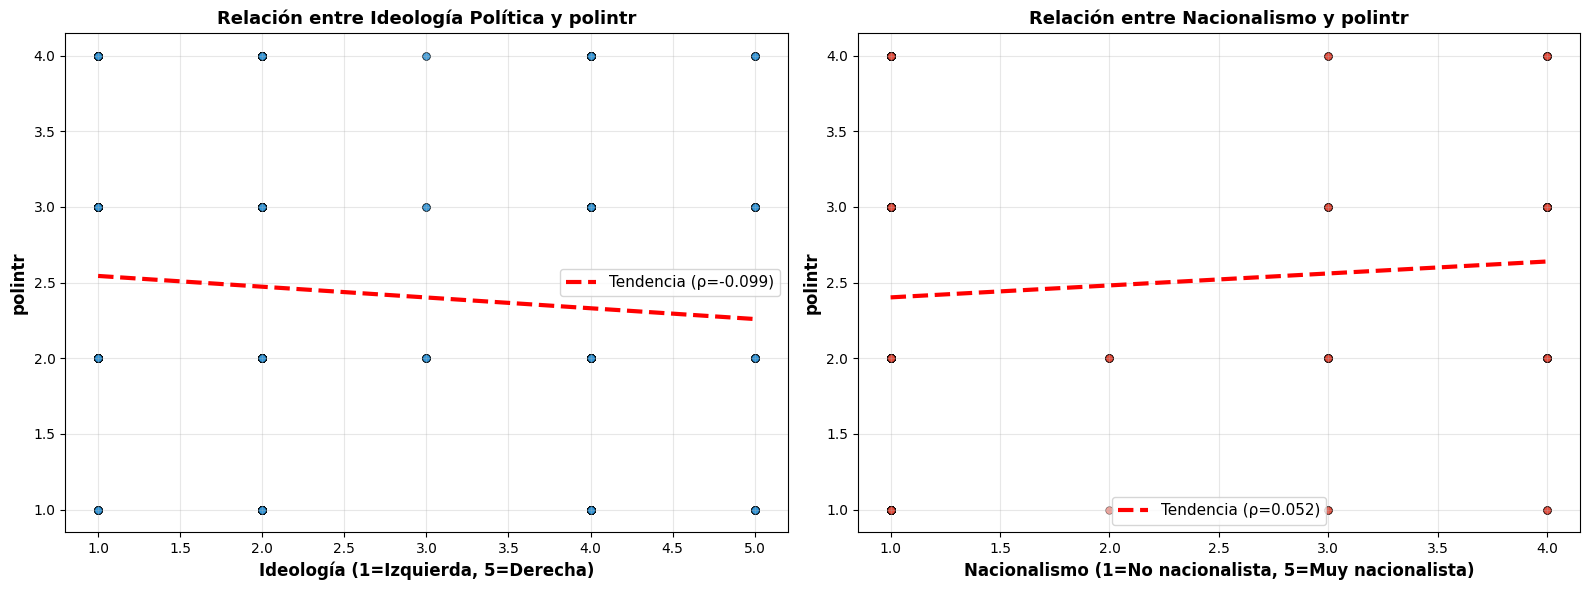

In [72]:
# Visualización: Gráficos de dispersión con líneas de tendencia
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Ideología vs polintr
ax1.scatter(df_clean_ideology_polintr['ideology'], df_clean_ideology_polintr['polintr'], 
           alpha=0.5, s=30, color='#3498db', edgecolors='black', linewidths=0.5)

# Línea de tendencia
z1 = np.polyfit(df_clean_ideology_polintr['ideology'], df_clean_ideology_polintr['polintr'], 1)
p1 = np.poly1d(z1)
ax1.plot(df_clean_ideology_polintr['ideology'].sort_values(), 
        p1(df_clean_ideology_polintr['ideology'].sort_values()), 
        "r--", linewidth=3, label=f'Tendencia (ρ={spearman_corr_ideo_polintr:.3f})')

ax1.set_xlabel('Ideología (1=Izquierda, 5=Derecha)', fontsize=12, fontweight='bold')
ax1.set_ylabel('polintr', fontsize=12, fontweight='bold')
ax1.set_title('Relación entre Ideología Política y polintr', fontsize=13, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Gráfico 2: Nacionalismo vs polintr
ax2.scatter(df_clean_nationalism_polintr['nationalism'], df_clean_nationalism_polintr['polintr'], 
           alpha=0.5, s=30, color='#e74c3c', edgecolors='black', linewidths=0.5)

# Línea de tendencia
z2 = np.polyfit(df_clean_nationalism_polintr['nationalism'], df_clean_nationalism_polintr['polintr'], 1)
p2 = np.poly1d(z2)
ax2.plot(df_clean_nationalism_polintr['nationalism'].sort_values(), 
        p2(df_clean_nationalism_polintr['nationalism'].sort_values()), 
        "r--", linewidth=3, label=f'Tendencia (ρ={spearman_corr_nat_polintr:.3f})')

ax2.set_xlabel('Nacionalismo (1=No nacionalista, 5=Muy nacionalista)', fontsize=12, fontweight='bold')
ax2.set_ylabel('polintr', fontsize=12, fontweight='bold')
ax2.set_title('Relación entre Nacionalismo y polintr', fontsize=13, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Variable Dependiente "imwbcnt": percepción sobre la inmigración

### Pregunta en la encuesta:

Is [country] made a worse or a better place to live by people coming to live here from other countries?

0:	Worse place to live /
1:	1 /
2:	2 /
3:	3 /
4:	4 /
5:	5 /
6:	6 /
7:	7 /
8:	8 /
9:	9 /
10:	Better place to live /
77:	Refusal* /
88:	Don't know* /
99:	No answer*

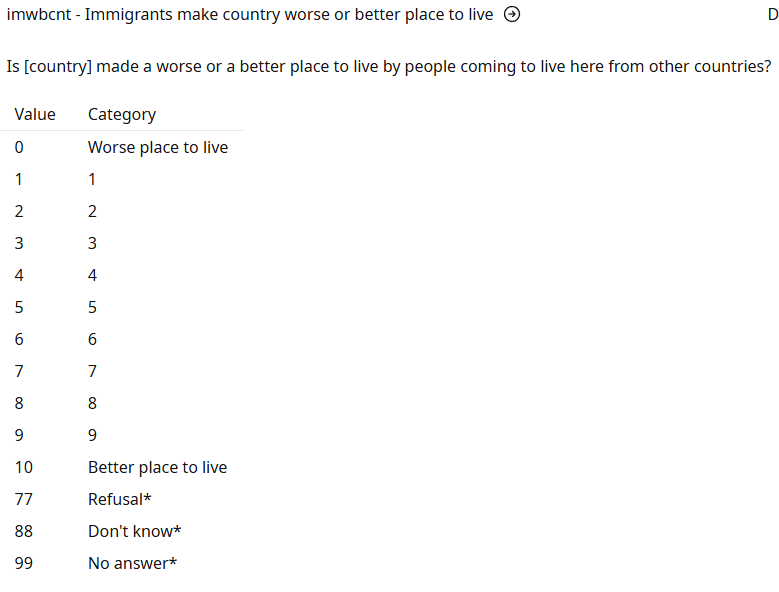

In [73]:
# Filtrar adicionalmente los valores inválidos de la variable imwbcnt (77, 88, 99)
df_clean = df_clean[~df_clean['imwbcnt'].isin([77, 88, 99])].copy()

In [74]:
# Estadísticas descriptivas de la variable imwbcnt
df_clean['imwbcnt'].describe()

count    41833.000000
mean         5.026964
std          2.461258
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: imwbcnt, dtype: float64

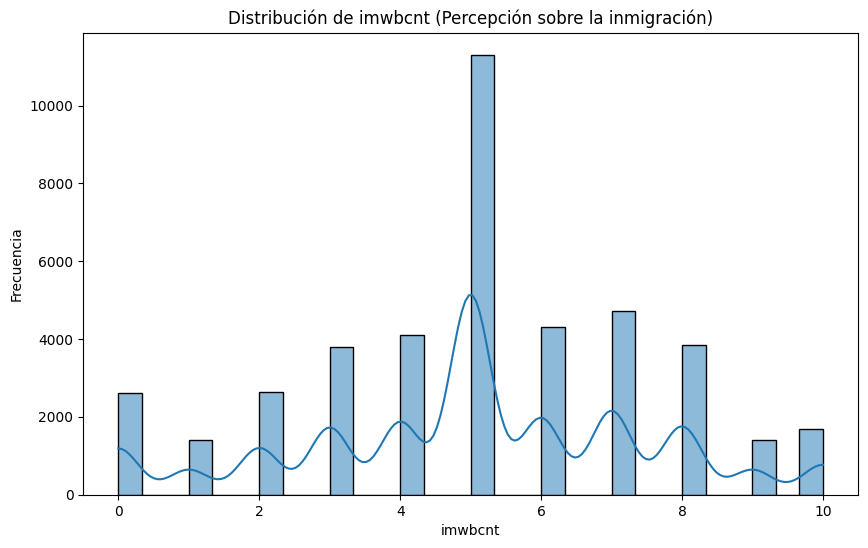

In [75]:
# Visualización de la distribución de la variable imwbcnt
plt.figure(figsize=(10,6))
sns.histplot(df_clean['imwbcnt'], bins=30, kde=True)
plt.title('Distribución de imwbcnt (Percepción sobre la inmigración)')
plt.xlabel('imwbcnt')
plt.ylabel('Frecuencia')
plt.show()

In [76]:
# Test de normalidad Shapiro-Wilk para la variable imwbcnt
shapiro_test_imwbcnt = stats.shapiro(df_clean['imwbcnt'])
print(f'Shapiro-Wilk Test: W={shapiro_test_imwbcnt.statistic}, p-value={shapiro_test_imwbcnt.pvalue}')
if shapiro_test_imwbcnt.pvalue > 0.05:
    print(f'imwbcnt is likely normally distributed (fail to reject H0)')
else:
    print(f'imwbcnt is likely not normally distributed (reject H0)')

Shapiro-Wilk Test: W=0.9640250498001102, p-value=1.3939047941833156e-69
imwbcnt is likely not normally distributed (reject H0)


C:\Users\paula\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 41833.



### Género

1= Hombre 2= Mujer

In [77]:
# Análisis de la variable imwbcnt según género. 1=Hombre, 2=Mujer
df_clean.groupby('gndr')['imwbcnt'].describe()

,count,mean,std,min,25%,50%,75%,max
gndr,,,,,,,,
1,19700.0,5.004569,2.476117,0.0,3.0,5.0,7.0,10.0
2,22133.0,5.046898,2.447841,0.0,4.0,5.0,7.0,10.0


In [78]:
# Frecuencia en las respuestas de imwbcnt por género
pd.crosstab(df_clean['imwbcnt'], df_clean['gndr'], normalize='columns') * 100

gndr,1,2
imwbcnt,,
0,6.670051,5.873582
1,3.390863,3.343424
2,6.116751,6.451904
3,9.076142,9.036281
4,9.842640,9.736592
5,26.969543,27.077215
6,9.939086,10.631184
7,11.304569,11.317942
8,9.512690,8.936882


In [79]:
# Gráfico de la frecuencia en las respuestas de imwbcnt por género
df_plot_imwbcnt = df_clean.copy()
df_plot_imwbcnt['gndr'] = df_plot_imwbcnt['gndr'].map({1: 'Hombre', 2: 'Mujer'})

fig = px.histogram(df_plot_imwbcnt, x='imwbcnt', color='gndr', barmode='group',
                   labels={'imwbcnt': 'Percepción sobre la inmigración', 'gndr': 'Género'},
                   title='Frecuencia de respuestas en imwbcnt por género',
                   histnorm='percent')
fig.update_layout(bargap=0.2)
fig.show()

Correlación de Spearman

In [80]:
from scipy.stats import spearmanr

# Correlación entre imwbcnt y género

# Recodificar género: Hombre=0, Mujer=1
df_clean['gndr_binary'] = df_clean['gndr'].map({1: 0, 2: 1})

# Calcular la correlación de Spearman (no paramétrica, apropiada para datos no normales)
spearman_corr_imwbcnt, spearman_pvalue_imwbcnt = spearmanr(df_clean['imwbcnt'], df_clean['gndr_binary'])

# Interpretación de la correlación entre imwbcnt y género
print("=" * 80)
print("CORRELACIÓN: IMWBCNT vs GÉNERO")
print("=" * 80)
print(f"\n📊 Coeficiente de correlación de Spearman: {spearman_corr_imwbcnt:.4f}")
print(f"📊 P-value: {spearman_pvalue_imwbcnt:.4e}\n")

print("💡 INTERPRETACIÓN:")
if spearman_corr_imwbcnt < 0:
    print(f"   ✓ Correlación NEGATIVA ({spearman_corr_imwbcnt:.4f})")
    print("   → Las MUJERES (codificadas como 1) tienen valores MÁS BAJOS de imwbcnt")
    print("   → Valores bajos de imwbcnt = Percepción MÁS NEGATIVA sobre inmigración")
    print("   → CONCLUSIÓN: Las MUJERES tienen una percepción MÁS NEGATIVA sobre la inmigración")
elif spearman_corr_imwbcnt > 0:
    print(f"   ✓ Correlación POSITIVA (+{spearman_corr_imwbcnt:.4f})")
    print("   → Las MUJERES (codificadas como 1) tienen valores MÁS ALTOS de imwbcnt")
    print("   → Valores altos de imwbcnt = Percepción MÁS POSITIVA sobre inmigración")
    print("   → CONCLUSIÓN: Las MUJERES tienen una percepción MÁS POSITIVA sobre la inmigración")
else:
    print("   ✓ Correlación CERO - No hay diferencia significativa entre géneros")

# Magnitud
abs_corr_gender_imwbcnt = abs(spearman_corr_imwbcnt)
if abs_corr_gender_imwbcnt < 0.20:
    fuerza_gender_imwbcnt = "MUY DÉBIL"
elif abs_corr_gender_imwbcnt < 0.40:
    fuerza_gender_imwbcnt = "DÉBIL"
elif abs_corr_gender_imwbcnt < 0.60:
    fuerza_gender_imwbcnt = "MODERADA"
elif abs_corr_gender_imwbcnt < 0.80:
    fuerza_gender_imwbcnt = "FUERTE"
else:
    fuerza_gender_imwbcnt = "MUY FUERTE"

print(f"\n   📏 Fuerza de la correlación: {fuerza_gender_imwbcnt} (|ρ| = {abs_corr_gender_imwbcnt:.4f})")

# Significancia estadística
if spearman_pvalue_imwbcnt < 0.001:
    print(f"   ✅ Altamente significativa (p < 0.001)")
elif spearman_pvalue_imwbcnt < 0.05:
    print(f"   ✅ Estadísticamente significativa (p < 0.05)")
else:
    print(f"   ❌ No significativa (p >= 0.05)")
    
print("=" * 80)

CORRELACIÓN: IMWBCNT vs GÉNERO

📊 Coeficiente de correlación de Spearman: 0.0069
📊 P-value: 1.5728e-01

💡 INTERPRETACIÓN:
   ✓ Correlación POSITIVA (+0.0069)
   → Las MUJERES (codificadas como 1) tienen valores MÁS ALTOS de imwbcnt
   → Valores altos de imwbcnt = Percepción MÁS POSITIVA sobre inmigración
   → CONCLUSIÓN: Las MUJERES tienen una percepción MÁS POSITIVA sobre la inmigración

   📏 Fuerza de la correlación: MUY DÉBIL (|ρ| = 0.0069)
   ❌ No significativa (p >= 0.05)


### Edad

In [81]:
# Análisis de la variable imwbcnt según edad en intervalos de 10 años
min_age_imwbcnt = df_clean['agea'].min()
df_clean.groupby(pd.cut(df_clean['agea'], bins=np.arange(min_age_imwbcnt, 100, 10))).agg({'imwbcnt': ['mean', 'count']})

C:\Users\paula\AppData\Local\Temp\ipykernel_11796\3709892908.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



imwbcnt      
              mean count
agea                    
(15, 25]  5.316396  4251
(25, 35]  5.334666  5253
(35, 45]  5.226163  6513
(45, 55]  5.019542  7164
(55, 65]  4.881823  7438
(65, 75]  4.798616  6793
(75, 85]  4.661419  3621
(85, 95]  4.724090   714

In [82]:
# Frecuencia en las respuestas de imwbcnt por edad en intervalos de 10 años
pd.crosstab(df_clean['imwbcnt'], pd.cut(df_clean['agea'], bins=np.arange(min_age_imwbcnt, 100, 10)), normalize='columns') * 100

agea,"(15, 25]","(25, 35]","(35, 45]","(45, 55]","(55, 65]","(65, 75]","(75, 85]","(85, 95]"
imwbcnt,,,,,,,,
0,5.128205,4.568818,5.650238,5.792853,6.735682,7.713823,8.312621,6.302521
1,1.976006,2.265372,2.871181,3.657175,4.208120,3.812748,4.335819,3.641457
2,4.446013,5.730059,5.834485,6.253490,6.856682,7.228029,7.207954,7.002801
3,7.433545,7.900247,8.367880,9.729202,9.491799,9.598116,10.162938,12.044818
4,9.880028,9.099562,8.613542,10.413177,9.626244,10.407773,10.577189,10.644258
5,29.381322,28.269560,26.777215,26.716918,26.660393,26.129840,25.959680,27.310924
6,11.056222,10.660575,11.054813,9.533780,10.419468,9.436184,10.245788,11.204482
7,12.585274,12.126404,12.098879,11.013400,10.648024,10.923009,10.218172,8.543417
8,9.927076,10.013326,9.780439,9.156896,8.873353,8.685411,7.787904,9.243697


In [83]:
# Gráfico de la media de imwbcnt por edad en intervalos de 10 años
age_means_imwbcnt = df_clean.groupby(pd.cut(df_clean['agea'], bins=np.arange(min_age_imwbcnt, 100, 10)))['imwbcnt'].mean().reset_index()
age_means_imwbcnt.columns = ['age_group', 'imwbcnt_mean']

# Convertir los intervalos a strings para mejor visualización
age_means_imwbcnt['age_label'] = age_means_imwbcnt['age_group'].astype(str)

fig = px.line(age_means_imwbcnt, 
              x='age_label', 
              y='imwbcnt_mean',
              markers=True,
              labels={'age_label': 'Grupo de edad', 'imwbcnt_mean': 'Media de percepción sobre la inmigración'},
              title='Media de imwbcnt por grupo de edad')

fig.update_layout(xaxis_tickangle=-45, height=500)
fig.show()

C:\Users\paula\AppData\Local\Temp\ipykernel_11796\3710668323.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Correlación de Spearman

In [84]:
# Correlación entre imwbcnt y edad

# Calcular la correlación de Spearman (no paramétrica, apropiada para datos no normales)
spearman_corr_age_imwbcnt, spearman_pvalue_age_imwbcnt = spearmanr(df_clean['imwbcnt'], df_clean['agea'])

# Interpretación de la correlación entre imwbcnt y edad
print("=" * 80)
print("CORRELACIÓN: IMWBCNT vs EDAD")
print("=" * 80)
print(f"\n📊 Coeficiente de correlación de Spearman: {spearman_corr_age_imwbcnt:.4f}")
print(f"📊 P-value: {spearman_pvalue_age_imwbcnt:.4e}\n")

print("💡 INTERPRETACIÓN:")
if spearman_corr_age_imwbcnt < 0:
    print(f"   ✓ Correlación NEGATIVA ({spearman_corr_age_imwbcnt:.4f})")
    print("   → A MENOR edad, valores MÁS ALTOS de imwbcnt")
    print("   → Valores altos de imwbcnt = Percepción MÁS POSITIVA sobre inmigración")
    print("   → CONCLUSIÓN: Las personas MÁS JÓVENES tienen una percepción")
    print("                  MÁS POSITIVA sobre la inmigración")
elif spearman_corr_age_imwbcnt > 0:
    print(f"   ✓ Correlación POSITIVA (+{spearman_corr_age_imwbcnt:.4f})")
    print("   → A MAYOR edad, valores MÁS ALTOS de imwbcnt")
    print("   → Valores altos de imwbcnt = Percepción MÁS POSITIVA sobre inmigración")
    print("   → CONCLUSIÓN: Las personas MAYORES tienen una percepción")
    print("                  MÁS POSITIVA sobre la inmigración")
else:
    print("   ✓ Correlación CERO - No hay relación lineal entre edad e imwbcnt")

# Magnitud
abs_corr_age_imwbcnt = abs(spearman_corr_age_imwbcnt)
if abs_corr_age_imwbcnt < 0.20:
    fuerza_age_imwbcnt = "MUY DÉBIL"
elif abs_corr_age_imwbcnt < 0.40:
    fuerza_age_imwbcnt = "DÉBIL"
elif abs_corr_age_imwbcnt < 0.60:
    fuerza_age_imwbcnt = "MODERADA"
elif abs_corr_age_imwbcnt < 0.80:
    fuerza_age_imwbcnt = "FUERTE"
else:
    fuerza_age_imwbcnt = "MUY FUERTE"

print(f"\n   📏 Fuerza de la correlación: {fuerza_age_imwbcnt} (|ρ| = {abs_corr_age_imwbcnt:.4f})")

# Significancia estadística
if spearman_pvalue_age_imwbcnt < 0.001:
    print(f"   ✅ Altamente significativa (p < 0.001)")
elif spearman_pvalue_age_imwbcnt < 0.05:
    print(f"   ✅ Estadísticamente significativa (p < 0.05)")
else:
    print(f"   ❌ No significativa (p >= 0.05)")

print("=" * 80)

CORRELACIÓN: IMWBCNT vs EDAD

📊 Coeficiente de correlación de Spearman: -0.0930
📊 P-value: 6.0559e-81

💡 INTERPRETACIÓN:
   ✓ Correlación NEGATIVA (-0.0930)
   → A MENOR edad, valores MÁS ALTOS de imwbcnt
   → Valores altos de imwbcnt = Percepción MÁS POSITIVA sobre inmigración
   → CONCLUSIÓN: Las personas MÁS JÓVENES tienen una percepción
                  MÁS POSITIVA sobre la inmigración

   📏 Fuerza de la correlación: MUY DÉBIL (|ρ| = 0.0930)
   ✅ Altamente significativa (p < 0.001)


### Nivel Educativo

In [85]:
# Análisis de la variable imwbcnt según nivel educativo
df_clean.groupby('education_level')['imwbcnt'].describe()

,count,mean,std,min,25%,50%,75%,max
education_level,,,,,,,,
0,323.0,4.046440,2.628265,0.0,2.0,4.0,6.00,10.0
1,2165.0,4.381986,2.535068,0.0,3.0,5.0,6.00,10.0
2,23.0,5.434783,2.312537,2.0,3.5,5.0,6.50,10.0
3,621.0,4.723027,2.390964,0.0,3.0,5.0,6.00,10.0
4,4351.0,4.824868,2.431524,0.0,3.0,5.0,7.00,10.0
5,42.0,3.880952,2.661399,0.0,2.0,3.5,5.75,8.0
6,380.0,4.360526,2.910996,0.0,2.0,5.0,6.00,10.0
7,34.0,4.970588,2.948911,0.0,3.0,5.0,7.75,10.0
8,651.0,5.082949,2.516873,0.0,4.0,5.0,7.00,10.0


In [86]:
# Gráfico de la media de imwbcnt por nivel educativo
education_means_imwbcnt = df_clean.groupby('education_level')['imwbcnt'].mean().reset_index()
education_means_imwbcnt.columns = ['education_level', 'imwbcnt_mean']

fig = px.line(education_means_imwbcnt, 
              x='education_level', 
              y='imwbcnt_mean',
              markers=True,
              labels={'education_level': 'Nivel Educativo (0=Básico, 26=Doctorado)', 
                      'imwbcnt_mean': 'Media de percepción sobre la inmigración'},
              title='Media de imwbcnt por nivel educativo')

fig.update_layout(height=500)
fig.show()

Correlación de Spearman

In [87]:
# Correlación entre imwbcnt y nivel educativo

# Filtrar valores válidos (sin NaN)
df_education_imwbcnt = df_clean[df_clean['education_level'].notna()].copy()

# Calcular la correlación de Spearman (no paramétrica, apropiada para datos no normales)
spearman_corr_edu_imwbcnt, spearman_pvalue_edu_imwbcnt = spearmanr(df_education_imwbcnt['imwbcnt'], df_education_imwbcnt['education_level'])

# Interpretación de la correlación entre imwbcnt y nivel educativo
print("=" * 80)
print("CORRELACIÓN: IMWBCNT vs NIVEL EDUCATIVO")
print("=" * 80)
print(f"\n📊 Coeficiente de correlación de Spearman: {spearman_corr_edu_imwbcnt:.4f}")
print(f"📊 P-value: {spearman_pvalue_edu_imwbcnt:.4e}\n")

print("💡 INTERPRETACIÓN:")
if spearman_corr_edu_imwbcnt < 0:
    print(f"   ✓ Correlación NEGATIVA ({spearman_corr_edu_imwbcnt:.4f})")
    print("   → A MENOR nivel educativo, valores MÁS ALTOS de imwbcnt")
    print("   → Valores altos de imwbcnt = Percepción MÁS POSITIVA sobre inmigración")
    print("   → CONCLUSIÓN: Las personas con MENOR nivel educativo tienen una")
    print("                  percepción MÁS POSITIVA sobre la inmigración")
elif spearman_corr_edu_imwbcnt > 0:
    print(f"   ✓ Correlación POSITIVA (+{spearman_corr_edu_imwbcnt:.4f})")
    print("   → A MAYOR nivel educativo, valores MÁS ALTOS de imwbcnt")
    print("   → Valores altos de imwbcnt = Percepción MÁS POSITIVA sobre inmigración")
    print("   → CONCLUSIÓN: Las personas con MAYOR nivel educativo tienen una")
    print("                  percepción MÁS POSITIVA sobre la inmigración")
else:
    print("   ✓ Correlación CERO - No hay relación lineal entre nivel educativo e imwbcnt")

# Magnitud
abs_corr_edu_imwbcnt = abs(spearman_corr_edu_imwbcnt)
if abs_corr_edu_imwbcnt < 0.20:
    fuerza_edu_imwbcnt = "MUY DÉBIL"
elif abs_corr_edu_imwbcnt < 0.40:
    fuerza_edu_imwbcnt = "DÉBIL"
elif abs_corr_edu_imwbcnt < 0.60:
    fuerza_edu_imwbcnt = "MODERADA"
elif abs_corr_edu_imwbcnt < 0.80:
    fuerza_edu_imwbcnt = "FUERTE"
else:
    fuerza_edu_imwbcnt = "MUY FUERTE"

print(f"\n   📏 Fuerza de la correlación: {fuerza_edu_imwbcnt} (|ρ| = {abs_corr_edu_imwbcnt:.4f})")

# Significancia estadística
if spearman_pvalue_edu_imwbcnt < 0.001:
    print(f"   ✅ Altamente significativa (p < 0.001)")
elif spearman_pvalue_edu_imwbcnt < 0.05:
    print(f"   ✅ Estadísticamente significativa (p < 0.05)")
else:
    print(f"   ❌ No significativa (p >= 0.05)")

print("=" * 80)

CORRELACIÓN: IMWBCNT vs NIVEL EDUCATIVO

📊 Coeficiente de correlación de Spearman: 0.1660
📊 P-value: 3.9437e-256

💡 INTERPRETACIÓN:
   ✓ Correlación POSITIVA (+0.1660)
   → A MAYOR nivel educativo, valores MÁS ALTOS de imwbcnt
   → Valores altos de imwbcnt = Percepción MÁS POSITIVA sobre inmigración
   → CONCLUSIÓN: Las personas con MAYOR nivel educativo tienen una
                  percepción MÁS POSITIVA sobre la inmigración

   📏 Fuerza de la correlación: MUY DÉBIL (|ρ| = 0.1660)
   ✅ Altamente significativa (p < 0.001)


### País

In [88]:
# Análisis de la variable imwbcnt según país
df_clean.groupby('cntry')['imwbcnt'].describe()

,count,mean,std,min,25%,50%,75%,max
cntry,,,,,,,,
AT,2165.0,4.415242,2.358735,0.0,3.0,5.0,5.0,10.0
BE,1524.0,5.370735,2.057214,0.0,4.0,5.0,7.0,10.0
BG,2067.0,3.881471,2.781661,0.0,2.0,4.0,5.0,10.0
CH,1295.0,5.833205,1.897279,0.0,5.0,5.0,7.0,10.0
CY,617.0,3.823339,2.403239,0.0,2.0,4.0,5.0,10.0
DE,2292.0,5.213787,2.295617,0.0,4.0,5.0,7.0,10.0
ES,1065.0,5.953991,2.277865,0.0,5.0,6.0,8.0,10.0
FI,1502.0,6.054594,2.087609,0.0,5.0,6.0,8.0,10.0
FR,1673.0,5.086671,2.244935,0.0,4.0,5.0,6.0,10.0


In [89]:
# Visualización de la variable imwbcnt por país en un mapa de Europa interactivo
country_data_imwbcnt = df_clean.groupby('cntry')['imwbcnt'].mean().reset_index()
country_data_imwbcnt.columns = ['country', 'imwbcnt_mean']

# Usar los mismos mapeos de códigos de país
country_data_imwbcnt['country_iso3'] = country_data_imwbcnt['country'].map(iso2_to_iso3)
country_data_imwbcnt['country_name'] = country_data_imwbcnt['country'].map(iso2_to_name)

# Crear mapa interactivo
fig = px.choropleth(country_data_imwbcnt, locations='country_iso3', locationmode='ISO-3', 
                    color='imwbcnt_mean', hover_name='country_name',
                    hover_data={'imwbcnt_mean': ':.2f', 'country': False, 'country_iso3': False, 'country_name': False},
                    color_continuous_scale='RdYlGn', range_color=[3, 7.5], scope='europe',
                    title='Percepción sobre la inmigración por país (imwbcnt)',
                    labels={'imwbcnt_mean': 'Media imwbcnt (0-10)'})

fig.update_layout(geo=dict(showframe=False, showcoastlines=True, projection_type='natural earth'),
                  height=600, width=900)
fig.show()

### Partido Político España

1=PP 2=PSOE 3=VOX 4=SUMAR 5=ERC 6=JuntsxCat 7=EH-Bildu 8=EAJ-PNV 9=BNG 10=CoaliciónCanaria(CC) 11=UPN 12= PACMA 50=Other 51=BlankVote 52=InvalidVote

In [90]:
# Análisis de la variable imwbcnt según partido político votado en España
df_clean.groupby('prtvtges')['imwbcnt'].describe()

,count,mean,std,min,25%,50%,75%,max
prtvtges,,,,,,,,
1.0,312.0,5.224359,2.255607,0.0,4.00,5.0,7.00,10.0
2.0,405.0,6.382716,2.212520,0.0,5.00,7.0,8.00,10.0
3.0,70.0,4.800000,2.488233,0.0,3.00,5.0,6.75,10.0
4.0,117.0,7.042735,1.971317,1.0,5.00,7.0,8.00,10.0
5.0,23.0,5.260870,1.814522,0.0,5.00,5.0,6.00,8.0
6.0,19.0,5.421053,2.008753,2.0,4.50,5.0,6.00,10.0
7.0,18.0,7.722222,1.808657,3.0,7.25,8.0,8.75,10.0
8.0,14.0,6.857143,1.994498,2.0,6.00,7.0,8.00,10.0
9.0,17.0,7.176471,1.845105,5.0,5.00,7.0,9.00,10.0


In [91]:
# Calcular media por partido
party_means_imwbcnt = df_clean.groupby('prtvtges')['imwbcnt'].mean().reset_index()
party_means_imwbcnt['party_name'] = party_means_imwbcnt['prtvtges'].map(party_names)

# Gráfico de barras
fig = px.bar(party_means_imwbcnt, 
             x='party_name', 
             y='imwbcnt',
             labels={'party_name': 'Partido Político', 'imwbcnt': 'Media de percepción sobre la inmigración'},
             title='Media de imwbcnt por partido político en España',
             color='imwbcnt',
             color_continuous_scale='RdYlGn',
             range_y=[0, 10])

fig.update_layout(xaxis_tickangle=-45, height=500)
fig.show()

Correlación de Spearman con Ideología y Nacionalismo

In [92]:
from scipy.stats import spearmanr

# CORRELACIÓN 1: Entre imwbcnt e ideología política (izquierda-derecha)
# Filtrar datos válidos (sin NaN)
df_clean_ideology_imwbcnt = df_clean[df_clean['ideology'].notna()].copy()

# Calcular correlación de Spearman (no paramétrica)
spearman_corr_ideo_imwbcnt, spearman_pvalue_ideo_imwbcnt = spearmanr(df_clean_ideology_imwbcnt['imwbcnt'], df_clean_ideology_imwbcnt['ideology'])

print("=" * 80)
print("CORRELACIÓN: IMWBCNT vs IDEOLOGÍA POLÍTICA (Izquierda-Derecha)")
print("=" * 80)
print(f"\n📊 Coeficiente de correlación de Spearman: {spearman_corr_ideo_imwbcnt:.4f}")
print(f"📊 P-value: {spearman_pvalue_ideo_imwbcnt:.4e}\n")

print("💡 INTERPRETACIÓN:")
if spearman_corr_ideo_imwbcnt > 0:
    print(f"   ✓ Correlación POSITIVA (+{spearman_corr_ideo_imwbcnt:.4f})")
    print("   → A más DERECHA, valores MÁS ALTOS de imwbcnt")
    print("   → Valores altos de imwbcnt = Percepción MÁS POSITIVA sobre inmigración")
    print("   → CONCLUSIÓN: Los votantes de DERECHA tienen una percepción")
    print("                  MÁS POSITIVA sobre la inmigración")
elif spearman_corr_ideo_imwbcnt < 0:
    print(f"   ✓ Correlación NEGATIVA ({spearman_corr_ideo_imwbcnt:.4f})")
    print("   → A más IZQUIERDA, valores MÁS ALTOS de imwbcnt")
    print("   → Valores altos de imwbcnt = Percepción MÁS POSITIVA sobre inmigración")
    print("   → CONCLUSIÓN: Los votantes de IZQUIERDA tienen una percepción")
    print("                  MÁS POSITIVA sobre la inmigración")
else:
    print("   ✓ Correlación CERO")
    print("   → No hay relación lineal entre ideología e imwbcnt")

# Magnitud
abs_corr_ideo_imwbcnt = abs(spearman_corr_ideo_imwbcnt)
if abs_corr_ideo_imwbcnt < 0.20:
    fuerza_ideo_imwbcnt = "MUY DÉBIL"
elif abs_corr_ideo_imwbcnt < 0.40:
    fuerza_ideo_imwbcnt = "DÉBIL"
elif abs_corr_ideo_imwbcnt < 0.60:
    fuerza_ideo_imwbcnt = "MODERADA"
elif abs_corr_ideo_imwbcnt < 0.80:
    fuerza_ideo_imwbcnt = "FUERTE"
else:
    fuerza_ideo_imwbcnt = "MUY FUERTE"

print(f"\n   📏 Fuerza de la correlación: {fuerza_ideo_imwbcnt} (|r| = {abs_corr_ideo_imwbcnt:.4f})")

# Significancia estadística
if spearman_pvalue_ideo_imwbcnt < 0.001:
    print(f"   ✅ Altamente significativa (p < 0.001)")
elif spearman_pvalue_ideo_imwbcnt < 0.05:
    print(f"   ✅ Estadísticamente significativa (p < 0.05)")
else:
    print(f"   ❌ No significativa (p >= 0.05)")

print("=" * 80)

CORRELACIÓN: IMWBCNT vs IDEOLOGÍA POLÍTICA (Izquierda-Derecha)

📊 Coeficiente de correlación de Spearman: -0.3027
📊 P-value: 5.6696e-23

💡 INTERPRETACIÓN:
   ✓ Correlación NEGATIVA (-0.3027)
   → A más IZQUIERDA, valores MÁS ALTOS de imwbcnt
   → Valores altos de imwbcnt = Percepción MÁS POSITIVA sobre inmigración
   → CONCLUSIÓN: Los votantes de IZQUIERDA tienen una percepción
                  MÁS POSITIVA sobre la inmigración

   📏 Fuerza de la correlación: DÉBIL (|r| = 0.3027)
   ✅ Altamente significativa (p < 0.001)


In [93]:
# CORRELACIÓN 2: Entre imwbcnt y nacionalismo
# Filtrar datos válidos (sin NaN)
df_clean_nationalism_imwbcnt = df_clean[df_clean['nationalism'].notna()].copy()

# Calcular correlación de Spearman (no paramétrica)
spearman_corr_nat_imwbcnt, spearman_pvalue_nat_imwbcnt = spearmanr(df_clean_nationalism_imwbcnt['imwbcnt'], df_clean_nationalism_imwbcnt['nationalism'])

print("=" * 80)
print("CORRELACIÓN: IMWBCNT vs NACIONALISMO")
print("=" * 80)
print(f"\n📊 Coeficiente de correlación de Spearman: {spearman_corr_nat_imwbcnt:.4f}")
print(f"📊 P-value: {spearman_pvalue_nat_imwbcnt:.4e}\n")

print("💡 INTERPRETACIÓN:")
if spearman_corr_nat_imwbcnt > 0:
    print(f"   ✓ Correlación POSITIVA (+{spearman_corr_nat_imwbcnt:.4f})")
    print("   → A más NACIONALISTA, valores MÁS ALTOS de imwbcnt")
    print("   → Valores altos de imwbcnt = Percepción MÁS POSITIVA sobre inmigración")
    print("   → CONCLUSIÓN: Los votantes de partidos MÁS NACIONALISTAS")
    print("                  tienen una percepción MÁS POSITIVA sobre la inmigración")
elif spearman_corr_nat_imwbcnt < 0:
    print(f"   ✓ Correlación NEGATIVA ({spearman_corr_nat_imwbcnt:.4f})")
    print("   → A más NACIONALISTA, valores MÁS BAJOS de imwbcnt")
    print("   → Valores bajos de imwbcnt = Percepción MÁS NEGATIVA sobre inmigración")
    print("   → CONCLUSIÓN: Los votantes de partidos MÁS NACIONALISTAS")
    print("                  tienen una percepción MÁS NEGATIVA sobre la inmigración")
else:
    print("   ✓ Correlación CERO")
    print("   → No hay relación lineal entre nacionalismo e imwbcnt")

# Magnitud
abs_corr_nat_imwbcnt = abs(spearman_corr_nat_imwbcnt)
if abs_corr_nat_imwbcnt < 0.20:
    fuerza_nat_imwbcnt = "MUY DÉBIL"
elif abs_corr_nat_imwbcnt < 0.40:
    fuerza_nat_imwbcnt = "DÉBIL"
elif abs_corr_nat_imwbcnt < 0.60:
    fuerza_nat_imwbcnt = "MODERADA"
elif abs_corr_nat_imwbcnt < 0.80:
    fuerza_nat_imwbcnt = "FUERTE"
else:
    fuerza_nat_imwbcnt = "MUY FUERTE"

print(f"\n   📏 Fuerza de la correlación: {fuerza_nat_imwbcnt} (|r| = {abs_corr_nat_imwbcnt:.4f})")

# Significancia estadística
if spearman_pvalue_nat_imwbcnt < 0.001:
    print(f"   ✅ Altamente significativa (p < 0.001)")
elif spearman_pvalue_nat_imwbcnt < 0.05:
    print(f"   ✅ Estadísticamente significativa (p < 0.05)")
else:
    print(f"   ❌ No significativa (p >= 0.05)")

print("=" * 80)

CORRELACIÓN: IMWBCNT vs NACIONALISMO

📊 Coeficiente de correlación de Spearman: 0.0364
📊 P-value: 2.4633e-01

💡 INTERPRETACIÓN:
   ✓ Correlación POSITIVA (+0.0364)
   → A más NACIONALISTA, valores MÁS ALTOS de imwbcnt
   → Valores altos de imwbcnt = Percepción MÁS POSITIVA sobre inmigración
   → CONCLUSIÓN: Los votantes de partidos MÁS NACIONALISTAS
                  tienen una percepción MÁS POSITIVA sobre la inmigración

   📏 Fuerza de la correlación: MUY DÉBIL (|r| = 0.0364)
   ❌ No significativa (p >= 0.05)


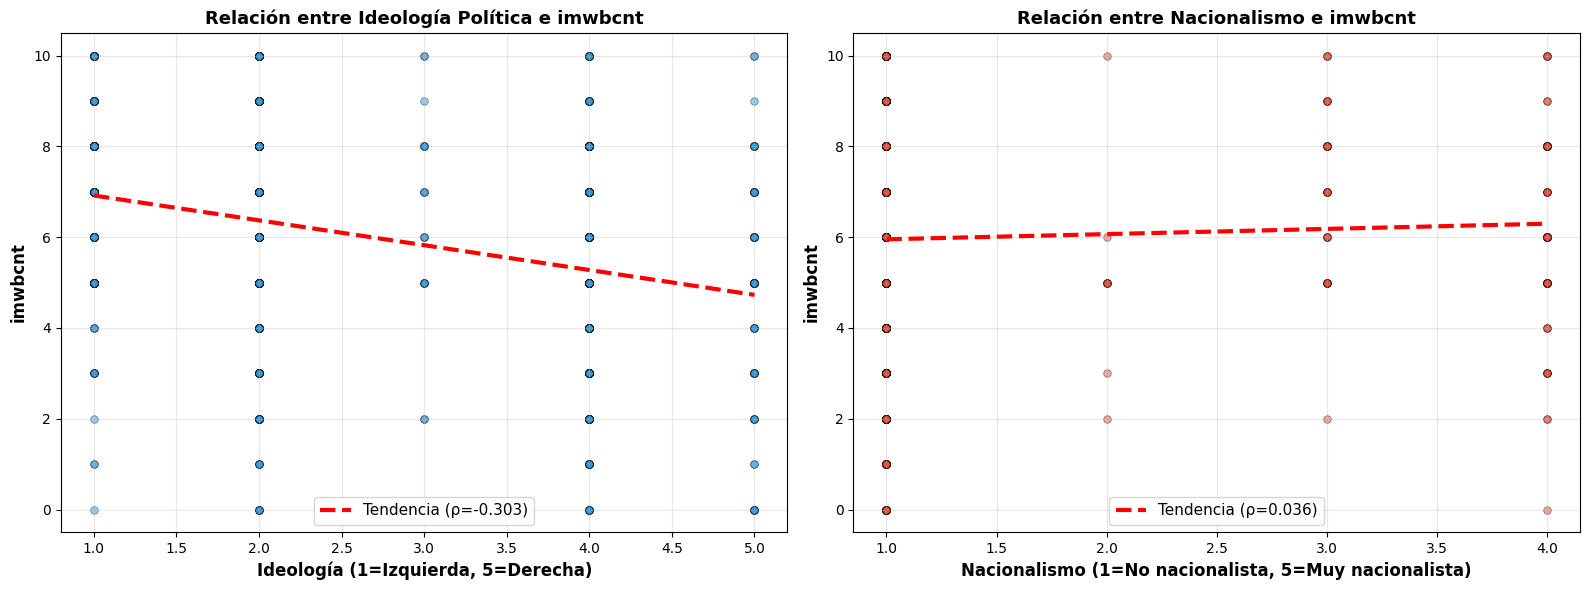

In [94]:
# Visualización: Gráficos de dispersión con líneas de tendencia
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Ideología vs imwbcnt
ax1.scatter(df_clean_ideology_imwbcnt['ideology'], df_clean_ideology_imwbcnt['imwbcnt'], 
           alpha=0.5, s=30, color='#3498db', edgecolors='black', linewidths=0.5)

# Línea de tendencia
z1 = np.polyfit(df_clean_ideology_imwbcnt['ideology'], df_clean_ideology_imwbcnt['imwbcnt'], 1)
p1 = np.poly1d(z1)
ax1.plot(df_clean_ideology_imwbcnt['ideology'].sort_values(), 
        p1(df_clean_ideology_imwbcnt['ideology'].sort_values()), 
        "r--", linewidth=3, label=f'Tendencia (ρ={spearman_corr_ideo_imwbcnt:.3f})')

ax1.set_xlabel('Ideología (1=Izquierda, 5=Derecha)', fontsize=12, fontweight='bold')
ax1.set_ylabel('imwbcnt', fontsize=12, fontweight='bold')
ax1.set_title('Relación entre Ideología Política e imwbcnt', fontsize=13, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Gráfico 2: Nacionalismo vs imwbcnt
ax2.scatter(df_clean_nationalism_imwbcnt['nationalism'], df_clean_nationalism_imwbcnt['imwbcnt'], 
           alpha=0.5, s=30, color='#e74c3c', edgecolors='black', linewidths=0.5)

# Línea de tendencia
z2 = np.polyfit(df_clean_nationalism_imwbcnt['nationalism'], df_clean_nationalism_imwbcnt['imwbcnt'], 1)
p2 = np.poly1d(z2)
ax2.plot(df_clean_nationalism_imwbcnt['nationalism'].sort_values(), 
        p2(df_clean_nationalism_imwbcnt['nationalism'].sort_values()), 
        "r--", linewidth=3, label=f'Tendencia (ρ={spearman_corr_nat_imwbcnt:.3f})')

ax2.set_xlabel('Nacionalismo (1=No nacionalista, 5=Muy nacionalista)', fontsize=12, fontweight='bold')
ax2.set_ylabel('imwbcnt', fontsize=12, fontweight='bold')
ax2.set_title('Relación entre Nacionalismo e imwbcnt', fontsize=13, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Variable Dependiente "wsekpwr": Percepción sobre que las mujeres quieren ganar poder controlando a los hombres 

### Pregunta en la encuesta:

Using this card, in your opinion, how often do women seek to gain power by getting control over men?

1:	Never /
2:	Rarely /
3:	Sometimes /
4:	Often /
5:	Always /
7:	Refusal* /
8:	Don't know* /
9:	No answer*

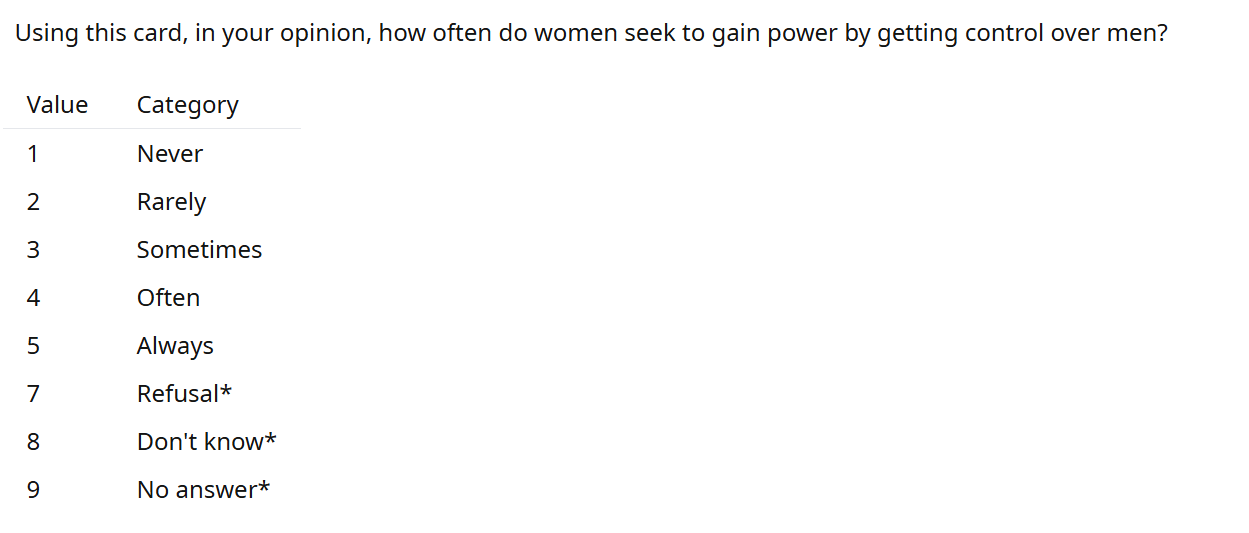

In [95]:
# Filtrar adicionalmente los valores inválidos de la variable wsekpwr (7, 8, 9)
df_clean = df_clean[~df_clean['wsekpwr'].isin([7, 8, 9])].copy()

In [96]:
df_clean['wsekpwr'].describe()

count    39504.000000
mean         2.905984
std          0.848449
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: wsekpwr, dtype: float64

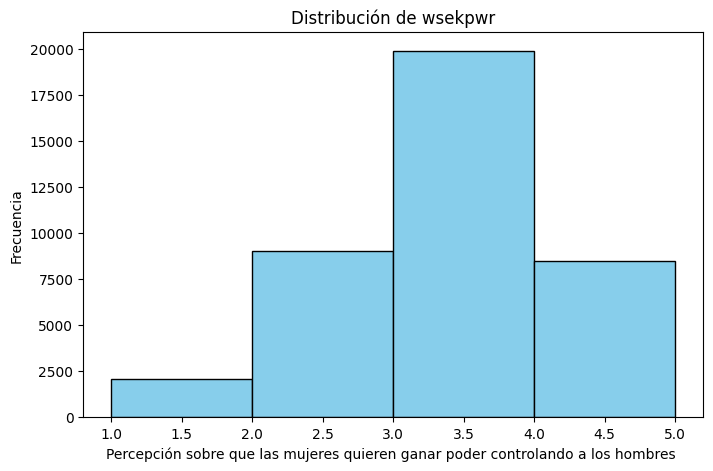

In [97]:
plt.figure(figsize=(8, 5))
plt.hist(df_clean['wsekpwr'], bins=4, color='skyblue', edgecolor='black')
plt.xlabel('Percepción sobre que las mujeres quieren ganar poder controlando a los hombres ')
plt.ylabel('Frecuencia')
plt.title('Distribución de wsekpwr')
plt.show()

In [98]:
# Test de Shapiro-Wilk para normalidad
shapiro_test_wsekpwr = stats.shapiro(df_clean['wsekpwr'])
print(f"Estadístico de Shapiro-Wilk: {shapiro_test_wsekpwr.statistic}")
print(f"p-valor: {shapiro_test_wsekpwr.pvalue}")
print("\nLa variable NO sigue una distribución normal (p < 0.05)" if shapiro_test_wsekpwr.pvalue < 0.05 
      else "La variable sigue una distribución normal (p >= 0.05)")

Estadístico de Shapiro-Wilk: 0.8782486217997675
p-valor: 1.4487175323589592e-96

La variable NO sigue una distribución normal (p < 0.05)


C:\Users\paula\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 39504.



### Género

1= Hombre 2= Mujer

In [99]:
# Análisis de la variable wsekpwr según género. 1=Hombre, 2=Mujer
df_clean.groupby('gndr')['wsekpwr'].describe()

,count,mean,std,min,25%,50%,75%,max
gndr,,,,,,,,
1,18683.0,2.990098,0.849793,1.0,2.0,3.0,3.0,5.0
2,20821.0,2.830508,0.840122,1.0,2.0,3.0,3.0,5.0


In [100]:
# Frecuencia en las respuestas de wsekpwr por género
pd.crosstab(df_clean['wsekpwr'], df_clean['gndr'], normalize='columns') * 100

gndr,1,2
wsekpwr,,
1,3.901943,6.455021
2,21.270674,24.326401
3,50.371996,50.439460
4,20.826420,17.271024
5,3.628968,1.508093


In [101]:
# Gráfico de la frecuencia en las respuestas de wsekpwr por género
df_plot_wsekpwr = df_clean.copy()
df_plot_wsekpwr['gndr'] = df_plot_wsekpwr['gndr'].map({1: 'Hombre', 2: 'Mujer'})

fig = px.histogram(df_plot_wsekpwr, x='wsekpwr', color='gndr', barmode='group',
                   category_orders={'wsekpwr': [1, 2, 3, 4]},
                   labels={'wsekpwr': 'Percepción sobre que las mujeres quieren ganar poder controlando a los hombres', 'gndr': 'Género'},
                   title='Frecuencia de respuestas en wsekpwr por género',
                   histnorm='percent')
fig.update_layout(bargap=0.2)
fig.show()

Correlación de Spearman

In [102]:
from scipy.stats import spearmanr

# Correlación entre wsekpwr y género

# Recodificar género: Hombre=0, Mujer=1
df_clean['gndr_binary'] = df_clean['gndr'].map({1: 0, 2: 1})

# Calcular la correlación de Spearman (no paramétrica, apropiada para datos no normales)
spearman_corr_wsekpwr, spearman_pvalue_wsekpwr = spearmanr(df_clean['wsekpwr'], df_clean['gndr_binary'])

# Interpretación de la correlación entre wsekpwr y género
print("=" * 80)
print("CORRELACIÓN: WSEKPWR vs GÉNERO")
print("=" * 80)
print(f"\n📊 Coeficiente de correlación de Spearman: {spearman_corr_wsekpwr:.4f}")
print(f"📊 P-value: {spearman_pvalue_wsekpwr:.4e}\n")

print("💡 INTERPRETACIÓN:")
if spearman_corr_wsekpwr < 0:
    print(f"   ✓ Correlación NEGATIVA ({spearman_corr_wsekpwr:.4f})")
    print("   → Las MUJERES (codificadas como 1) tienen valores MÁS BAJOS de wsekpwr")
    print("   → Valores bajos de wsekpwr = Menor acuerdo con que las mujeres buscan controlar a los hombres para obtener más poder")
    print("   → CONCLUSIÓN: Las MUJERES están MENOS de acuerdo con esta afirmación")
elif spearman_corr_wsekpwr > 0:
    print(f"   ✓ Correlación POSITIVA (+{spearman_corr_wsekpwr:.4f})")
    print("   → Las MUJERES (codificadas como 1) tienen valores MÁS ALTOS de wsekpwr")
    print("   → Valores altos de wsekpwr = Mayor acuerdo con que las mujeres buscan controlar a los hombres para obtener más poder")
    print("   → CONCLUSIÓN: Las MUJERES están MÁS de acuerdo con esta afirmación")
else:
    print("   ✓ Correlación CERO - No hay diferencia significativa entre géneros")

# Magnitud
abs_corr_gender_wsekpwr = abs(spearman_corr_wsekpwr)
if abs_corr_gender_wsekpwr < 0.20:
    fuerza_gender_wsekpwr = "MUY DÉBIL"
elif abs_corr_gender_wsekpwr < 0.40:
    fuerza_gender_wsekpwr = "DÉBIL"
elif abs_corr_gender_wsekpwr < 0.60:
    fuerza_gender_wsekpwr = "MODERADA"
elif abs_corr_gender_wsekpwr < 0.80:
    fuerza_gender_wsekpwr = "FUERTE"
else:
    fuerza_gender_wsekpwr = "MUY FUERTE"

print(f"\n   📏 Fuerza de la correlación: {fuerza_gender_wsekpwr} (|ρ| = {abs_corr_gender_wsekpwr:.4f})")

# Significancia estadística
if spearman_pvalue_wsekpwr < 0.001:
    print(f"   ✅ Altamente significativa (p < 0.001)")
elif spearman_pvalue_wsekpwr < 0.05:
    print(f"   ✅ Estadísticamente significativa (p < 0.05)")
else:
    print(f"   ❌ No significativa (p >= 0.05)")
    
print("=" * 80)

CORRELACIÓN: WSEKPWR vs GÉNERO

📊 Coeficiente de correlación de Spearman: -0.0863
📊 P-value: 3.0493e-66

💡 INTERPRETACIÓN:
   ✓ Correlación NEGATIVA (-0.0863)
   → Las MUJERES (codificadas como 1) tienen valores MÁS BAJOS de wsekpwr
   → Valores bajos de wsekpwr = Menor acuerdo con que las mujeres buscan controlar a los hombres para obtener más poder
   → CONCLUSIÓN: Las MUJERES están MENOS de acuerdo con esta afirmación

   📏 Fuerza de la correlación: MUY DÉBIL (|ρ| = 0.0863)
   ✅ Altamente significativa (p < 0.001)


### Edad

In [103]:
# Análisis de la variable wsekpwr según edad en intervalos de 10 años
min_age_wsekpwr = df_clean['agea'].min()
df_clean.groupby(pd.cut(df_clean['agea'], bins=np.arange(min_age_wsekpwr, 100, 10))).agg({'wsekpwr': ['mean', 'count']})

C:\Users\paula\AppData\Local\Temp\ipykernel_11796\3338180134.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



wsekpwr      
              mean count
agea                    
(15, 25]  2.814115  4024
(25, 35]  2.839506  5022
(35, 45]  2.894805  6198
(45, 55]  2.935267  6828
(55, 65]  2.969680  7058
(65, 75]  2.947946  6378
(75, 85]  2.880230  3298
(85, 95]  2.842949   624

In [104]:
# Frecuencia en las respuestas de wsekpwr por edad en intervalos de 10 años
pd.crosstab(df_clean['wsekpwr'], pd.cut(df_clean['agea'], bins=np.arange(min_age_wsekpwr, 100, 10)), normalize='columns') * 100

agea,"(15, 25]","(25, 35]","(35, 45]","(45, 55]","(55, 65]","(65, 75]","(75, 85]","(85, 95]"
wsekpwr,,,,,,,,
1,6.684891,6.093190,5.663117,5.213825,4.165486,4.264660,5.154639,7.211538
2,28.131213,26.324174,23.830268,21.470416,20.388212,20.649106,22.316555,20.833333
3,45.129225,47.590601,48.628590,50.585823,52.196090,53.684541,53.517283,53.525641
4,17.196819,17.522899,19.119071,20.035149,20.813262,18.830354,17.374166,17.307692
5,2.857853,2.469136,2.758955,2.694786,2.436951,2.571339,1.637356,1.121795


In [105]:
# Gráfico de la media de wsekpwr por edad en intervalos de 10 años
age_means_wsekpwr = df_clean.groupby(pd.cut(df_clean['agea'], bins=np.arange(min_age_wsekpwr, 100, 10)))['wsekpwr'].mean().reset_index()
age_means_wsekpwr.columns = ['age_group', 'wsekpwr_mean']

# Convertir los intervalos a strings para mejor visualización
age_means_wsekpwr['age_label'] = age_means_wsekpwr['age_group'].astype(str)

fig = px.line(age_means_wsekpwr, 
              x='age_label', 
              y='wsekpwr_mean',
              markers=True,
              labels={'age_label': 'Grupo de edad', 'wsekpwr_mean': 'Media de wsekpwr'},
              title='Media de wsekpwr por grupo de edad')

fig.update_layout(xaxis_tickangle=-45, height=500)
fig.show()

C:\Users\paula\AppData\Local\Temp\ipykernel_11796\3847920356.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Correlación de Spearman

In [106]:
# Correlación entre wsekpwr y edad

# Calcular la correlación de Spearman (no paramétrica, apropiada para datos no normales)
spearman_corr_age_wsekpwr, spearman_pvalue_age_wsekpwr = spearmanr(df_clean['wsekpwr'], df_clean['agea'])

# Interpretación de la correlación entre wsekpwr y edad
print("=" * 80)
print("CORRELACIÓN: WSEKPWR vs EDAD")
print("=" * 80)
print(f"\n📊 Coeficiente de correlación de Spearman: {spearman_corr_age_wsekpwr:.4f}")
print(f"📊 P-value: {spearman_pvalue_age_wsekpwr:.4e}\n")

print("💡 INTERPRETACIÓN:")
if spearman_corr_age_wsekpwr < 0:
    print(f"   ✓ Correlación NEGATIVA ({spearman_corr_age_wsekpwr:.4f})")
    print("   → A MENOR edad, valores MÁS ALTOS de wsekpwr")
    print("   → Valores altos de wsekpwr = Mayor acuerdo con que las mujeres buscan controlar a los hombres para obtener más poder")
    print("   → CONCLUSIÓN: Las personas MÁS JÓVENES están MÁS de acuerdo")
    print("                  con esta afirmación")
elif spearman_corr_age_wsekpwr > 0:
    print(f"   ✓ Correlación POSITIVA (+{spearman_corr_age_wsekpwr:.4f})")
    print("   → A MAYOR edad, valores MÁS ALTOS de wsekpwr")
    print("   → Valores altos de wsekpwr = Mayor acuerdo con que las mujeres buscan controlar a los hombres para obtener más poder")
    print("   → CONCLUSIÓN: Las personas MAYORES están MÁS de acuerdo")
    print("                  con esta afirmación")
else:
    print("   ✓ Correlación CERO - No hay relación lineal entre edad y wsekpwr")

# Magnitud
abs_corr_age_wsekpwr = abs(spearman_corr_age_wsekpwr)
if abs_corr_age_wsekpwr < 0.20:
    fuerza_age_wsekpwr = "MUY DÉBIL"
elif abs_corr_age_wsekpwr < 0.40:
    fuerza_age_wsekpwr = "DÉBIL"
elif abs_corr_age_wsekpwr < 0.60:
    fuerza_age_wsekpwr = "MODERADA"
elif abs_corr_age_wsekpwr < 0.80:
    fuerza_age_wsekpwr = "FUERTE"
else:
    fuerza_age_wsekpwr = "MUY FUERTE"

print(f"\n   📏 Fuerza de la correlación: {fuerza_age_wsekpwr} (|ρ| = {abs_corr_age_wsekpwr:.4f})")

# Significancia estadística
if spearman_pvalue_age_wsekpwr < 0.001:
    print(f"   ✅ Altamente significativa (p < 0.001)")
elif spearman_pvalue_age_wsekpwr < 0.05:
    print(f"   ✅ Estadísticamente significativa (p < 0.05)")
else:
    print(f"   ❌ No significativa (p >= 0.05)")

print("=" * 80)

CORRELACIÓN: WSEKPWR vs EDAD

📊 Coeficiente de correlación de Spearman: 0.0449
📊 P-value: 4.5711e-19

💡 INTERPRETACIÓN:
   ✓ Correlación POSITIVA (+0.0449)
   → A MAYOR edad, valores MÁS ALTOS de wsekpwr
   → Valores altos de wsekpwr = Mayor acuerdo con que las mujeres buscan controlar a los hombres para obtener más poder
   → CONCLUSIÓN: Las personas MAYORES están MÁS de acuerdo
                  con esta afirmación

   📏 Fuerza de la correlación: MUY DÉBIL (|ρ| = 0.0449)
   ✅ Altamente significativa (p < 0.001)


### Nivel Educativo

In [107]:
# Análisis de la variable wsekpwr según nivel educativo
df_clean.groupby('education_level')['wsekpwr'].describe()

,count,mean,std,min,25%,50%,75%,max
education_level,,,,,,,,
0,290.0,2.800000,0.988515,1.0,2.00,3.0,3.0,5.0
1,1941.0,2.887172,0.876465,1.0,2.00,3.0,3.0,5.0
2,23.0,2.695652,0.764840,1.0,2.00,3.0,3.0,4.0
3,585.0,2.842735,0.877352,1.0,2.00,3.0,3.0,5.0
4,4007.0,2.886449,0.883269,1.0,2.00,3.0,3.0,5.0
5,37.0,3.594595,0.797895,2.0,3.00,4.0,4.0,5.0
6,360.0,2.975000,0.909215,1.0,3.00,3.0,3.0,5.0
7,34.0,3.500000,0.929320,1.0,3.00,4.0,4.0,5.0
8,615.0,3.143089,0.890968,1.0,3.00,3.0,4.0,5.0


In [108]:
# Gráfico de la media de wsekpwr por nivel educativo
education_means_wsekpwr = df_clean.groupby('education_level')['wsekpwr'].mean().reset_index()
education_means_wsekpwr.columns = ['education_level', 'wsekpwr_mean']

fig = px.line(education_means_wsekpwr, 
              x='education_level', 
              y='wsekpwr_mean',
              markers=True,
              labels={'education_level': 'Nivel Educativo (0=Básico, 26=Doctorado)', 
                      'wsekpwr_mean': 'Media de wsekpwr'},
              title='Media de wsekpwr por nivel educativo')

fig.update_layout(height=500)
fig.show()

Correlación de Spearman

In [109]:
# Correlación entre wsekpwr y nivel educativo

# Filtrar valores válidos (sin NaN)
df_education_wsekpwr = df_clean[df_clean['education_level'].notna()].copy()

# Calcular la correlación de Spearman (no paramétrica, apropiada para datos no normales)
spearman_corr_edu_wsekpwr, spearman_pvalue_edu_wsekpwr = spearmanr(df_education_wsekpwr['wsekpwr'], df_education_wsekpwr['education_level'])

# Interpretación de la correlación entre wsekpwr y nivel educativo
print("=" * 80)
print("CORRELACIÓN: WSEKPWR vs NIVEL EDUCATIVO")
print("=" * 80)
print(f"\n📊 Coeficiente de correlación de Spearman: {spearman_corr_edu_wsekpwr:.4f}")
print(f"📊 P-value: {spearman_pvalue_edu_wsekpwr:.4e}\n")

print("💡 INTERPRETACIÓN:")
if spearman_corr_edu_wsekpwr < 0:
    print(f"   ✓ Correlación NEGATIVA ({spearman_corr_edu_wsekpwr:.4f})")
    print("   → A MENOR nivel educativo, valores MÁS ALTOS de wsekpwr")
    print("   → Valores altos de wsekpwr = Mayor acuerdo con que las mujeres buscan controlar a los hombres para obtener más poder")
    print("   → CONCLUSIÓN: Las personas con MENOR nivel educativo están MÁS de acuerdo")
    print("                  con esta afirmación")
elif spearman_corr_edu_wsekpwr > 0:
    print(f"   ✓ Correlación POSITIVA (+{spearman_corr_edu_wsekpwr:.4f})")
    print("   → A MAYOR nivel educativo, valores MÁS ALTOS de wsekpwr")
    print("   → Valores altos de wsekpwr = Mayor acuerdo con que las mujeres buscan controlar a los hombres para obtener más poder")
    print("   → CONCLUSIÓN: Las personas con MAYOR nivel educativo están MÁS de acuerdo")
    print("                  con esta afirmación")
else:
    print("   ✓ Correlación CERO - No hay relación lineal entre nivel educativo y wsekpwr")

# Magnitud
abs_corr_edu_wsekpwr = abs(spearman_corr_edu_wsekpwr)
if abs_corr_edu_wsekpwr < 0.20:
    fuerza_edu_wsekpwr = "MUY DÉBIL"
elif abs_corr_edu_wsekpwr < 0.40:
    fuerza_edu_wsekpwr = "DÉBIL"
elif abs_corr_edu_wsekpwr < 0.60:
    fuerza_edu_wsekpwr = "MODERADA"
elif abs_corr_edu_wsekpwr < 0.80:
    fuerza_edu_wsekpwr = "FUERTE"
else:
    fuerza_edu_wsekpwr = "MUY FUERTE"

print(f"\n   📏 Fuerza de la correlación: {fuerza_edu_wsekpwr} (|ρ| = {abs_corr_edu_wsekpwr:.4f})")

# Significancia estadística
if spearman_pvalue_edu_wsekpwr < 0.001:
    print(f"   ✅ Altamente significativa (p < 0.001)")
elif spearman_pvalue_edu_wsekpwr < 0.05:
    print(f"   ✅ Estadísticamente significativa (p < 0.05)")
else:
    print(f"   ❌ No significativa (p >= 0.05)")

print("=" * 80)

CORRELACIÓN: WSEKPWR vs NIVEL EDUCATIVO

📊 Coeficiente de correlación de Spearman: -0.0198
📊 P-value: 8.6066e-05

💡 INTERPRETACIÓN:
   ✓ Correlación NEGATIVA (-0.0198)
   → A MENOR nivel educativo, valores MÁS ALTOS de wsekpwr
   → Valores altos de wsekpwr = Mayor acuerdo con que las mujeres buscan controlar a los hombres para obtener más poder
   → CONCLUSIÓN: Las personas con MENOR nivel educativo están MÁS de acuerdo
                  con esta afirmación

   📏 Fuerza de la correlación: MUY DÉBIL (|ρ| = 0.0198)
   ✅ Altamente significativa (p < 0.001)


### País

In [110]:
# Análisis de la variable wsekpwr según país
df_clean.groupby('cntry')['wsekpwr'].describe()

,count,mean,std,min,25%,50%,75%,max
cntry,,,,,,,,
AT,2032.0,2.756398,0.816622,1.0,2.0,3.0,3.0,5.0
BE,1484.0,3.001348,0.746309,1.0,3.0,3.0,3.0,5.0
BG,1957.0,3.078181,0.975424,1.0,3.0,3.0,4.0,5.0
CH,1229.0,2.909683,0.734766,1.0,3.0,3.0,3.0,5.0
CY,585.0,3.107692,0.817421,1.0,3.0,3.0,4.0,5.0
DE,2213.0,3.108450,0.730989,1.0,3.0,3.0,4.0,5.0
ES,1032.0,2.789729,0.937096,1.0,2.0,3.0,3.0,5.0
FI,1459.0,2.569568,0.740597,1.0,2.0,3.0,3.0,5.0
FR,1614.0,2.844486,0.751096,1.0,2.0,3.0,3.0,5.0


In [111]:
# Visualización de la variable wsekpwr por país en un mapa de Europa interactivo
country_data_wsekpwr = df_clean.groupby('cntry')['wsekpwr'].mean().reset_index()
country_data_wsekpwr.columns = ['country', 'wsekpwr_mean']

# Usar los mismos mapeos de códigos de país
country_data_wsekpwr['country_iso3'] = country_data_wsekpwr['country'].map(iso2_to_iso3)
country_data_wsekpwr['country_name'] = country_data_wsekpwr['country'].map(iso2_to_name)

# Crear mapa interactivo
fig = px.choropleth(country_data_wsekpwr, locations='country_iso3', locationmode='ISO-3', 
                    color='wsekpwr_mean', hover_name='country_name',
                    hover_data={'wsekpwr_mean': ':.2f', 'country': False, 'country_iso3': False, 'country_name': False},
                    color_continuous_scale='RdYlGn', range_color=[2.5, 3.5], scope='europe',
                    title='Percepción sobre que las mujeres quieren ganar poder controlando a los hombres por país (wsekpwr)',
                    labels={'wsekpwr_mean': 'Media wsekpwr (1-4)'})

fig.update_layout(geo=dict(showframe=False, showcoastlines=True, projection_type='natural earth'),
                  height=600, width=900)
fig.show()

### Partido Político España

1=PP 2=PSOE 3=VOX 4=SUMAR 5=ERC 6=JuntsxCat 7=EH-Bildu 8=EAJ-PNV 9=BNG 10=CoaliciónCanaria(CC) 11=UPN 12= PACMA 50=Other 51=BlankVote 52=InvalidVote

In [112]:
# Análisis de la variable wsekpwr según partido político votado en España
df_clean.groupby('prtvtges')['wsekpwr'].describe()

,count,mean,std,min,25%,50%,75%,max
prtvtges,,,,,,,,
1.0,303.0,2.973597,0.948664,1.0,2.00,3.0,3.00,5.0
2.0,390.0,2.664103,0.955296,1.0,2.00,3.0,3.00,5.0
3.0,69.0,3.289855,0.940923,1.0,3.00,3.0,4.00,5.0
4.0,113.0,2.380531,0.837925,1.0,2.00,2.0,3.00,5.0
5.0,21.0,2.857143,0.910259,1.0,2.00,3.0,3.00,5.0
6.0,19.0,3.000000,0.471405,2.0,3.00,3.0,3.00,4.0
7.0,18.0,2.500000,0.857493,1.0,2.00,2.5,3.00,4.0
8.0,14.0,2.642857,0.744946,1.0,2.00,3.0,3.00,4.0
9.0,17.0,3.000000,0.707107,2.0,3.00,3.0,3.00,4.0


In [113]:
# Calcular media por partido
party_means_wsekpwr = df_clean.groupby('prtvtges')['wsekpwr'].mean().reset_index()
party_means_wsekpwr['party_name'] = party_means_wsekpwr['prtvtges'].map(party_names)

# Gráfico de barras
fig = px.bar(party_means_wsekpwr, 
             x='party_name', 
             y='wsekpwr',
             labels={'party_name': 'Partido Político', 'wsekpwr': 'Media de percepción de control de las mujeres'},
             title='Media de wsekpwr por partido político en España',
             color='wsekpwr',
             color_continuous_scale='RdYlGn',
             range_y=[1, 4])

fig.update_layout(xaxis_tickangle=-45, height=500)
fig.show()

Correlación de Spearman con Ideología y Nacionalismo

In [114]:
from scipy.stats import spearmanr

# CORRELACIÓN 1: Entre wsekpwr e ideología política (izquierda-derecha)
# Filtrar datos válidos (sin NaN)
df_clean_ideology_wsekpwr = df_clean[df_clean['ideology'].notna()].copy()

# Calcular correlación de Spearman (no paramétrica)
spearman_corr_ideo_wsekpwr, spearman_pvalue_ideo_wsekpwr = spearmanr(df_clean_ideology_wsekpwr['wsekpwr'], df_clean_ideology_wsekpwr['ideology'])

print("=" * 80)
print("CORRELACIÓN: WSEKPWR vs IDEOLOGÍA POLÍTICA (Izquierda-Derecha)")
print("=" * 80)
print(f"\n📊 Coeficiente de correlación de Spearman: {spearman_corr_ideo_wsekpwr:.4f}")
print(f"📊 P-value: {spearman_pvalue_ideo_wsekpwr:.4e}\n")

print("💡 INTERPRETACIÓN:")
if spearman_corr_ideo_wsekpwr > 0:
    print(f"   ✓ Correlación POSITIVA (+{spearman_corr_ideo_wsekpwr:.4f})")
    print("   → A más DERECHA, valores MÁS ALTOS de wsekpwr")
    print("   → Valores altos de wsekpwr = Mayor acuerdo con que las mujeres buscan controlar a los hombres para obtener más poder")
    print("   → CONCLUSIÓN: Los votantes de DERECHA perciben MÁS")
    print("                  control de las mujeres sobre los hombres")
elif spearman_corr_ideo_wsekpwr < 0:
    print(f"   ✓ Correlación NEGATIVA ({spearman_corr_ideo_wsekpwr:.4f})")
    print("   → A más IZQUIERDA, valores MÁS ALTOS de wsekpwr")
    print("   → Valores altos de wsekpwr = Mayor acuerdo con que las mujeres buscan controlar a los hombres para obtener más poder")
    print("   → CONCLUSIÓN: Los votantes de IZQUIERDA perciben MÁS")
    print("                  control de las mujeres sobre los hombres")
else:
    print("   ✓ Correlación CERO")
    print("   → No hay relación lineal entre ideología y wsekpwr")

# Magnitud
abs_corr_ideo_wsekpwr = abs(spearman_corr_ideo_wsekpwr)
if abs_corr_ideo_wsekpwr < 0.20:
    fuerza_ideo_wsekpwr = "MUY DÉBIL"
elif abs_corr_ideo_wsekpwr < 0.40:
    fuerza_ideo_wsekpwr = "DÉBIL"
elif abs_corr_ideo_wsekpwr < 0.60:
    fuerza_ideo_wsekpwr = "MODERADA"
elif abs_corr_ideo_wsekpwr < 0.80:
    fuerza_ideo_wsekpwr = "FUERTE"
else:
    fuerza_ideo_wsekpwr = "MUY FUERTE"

print(f"\n   📏 Fuerza de la correlación: {fuerza_ideo_wsekpwr} (|r| = {abs_corr_ideo_wsekpwr:.4f})")

# Significancia estadística
if spearman_pvalue_ideo_wsekpwr < 0.001:
    print(f"   ✅ Altamente significativa (p < 0.001)")
elif spearman_pvalue_ideo_wsekpwr < 0.05:
    print(f"   ✅ Estadísticamente significativa (p < 0.05)")
else:
    print(f"   ❌ No significativa (p >= 0.05)")

print("=" * 80)

CORRELACIÓN: WSEKPWR vs IDEOLOGÍA POLÍTICA (Izquierda-Derecha)

📊 Coeficiente de correlación de Spearman: 0.2273
📊 P-value: 5.2295e-13

💡 INTERPRETACIÓN:
   ✓ Correlación POSITIVA (+0.2273)
   → A más DERECHA, valores MÁS ALTOS de wsekpwr
   → Valores altos de wsekpwr = Mayor acuerdo con que las mujeres buscan controlar a los hombres para obtener más poder
   → CONCLUSIÓN: Los votantes de DERECHA perciben MÁS
                  control de las mujeres sobre los hombres

   📏 Fuerza de la correlación: DÉBIL (|r| = 0.2273)
   ✅ Altamente significativa (p < 0.001)


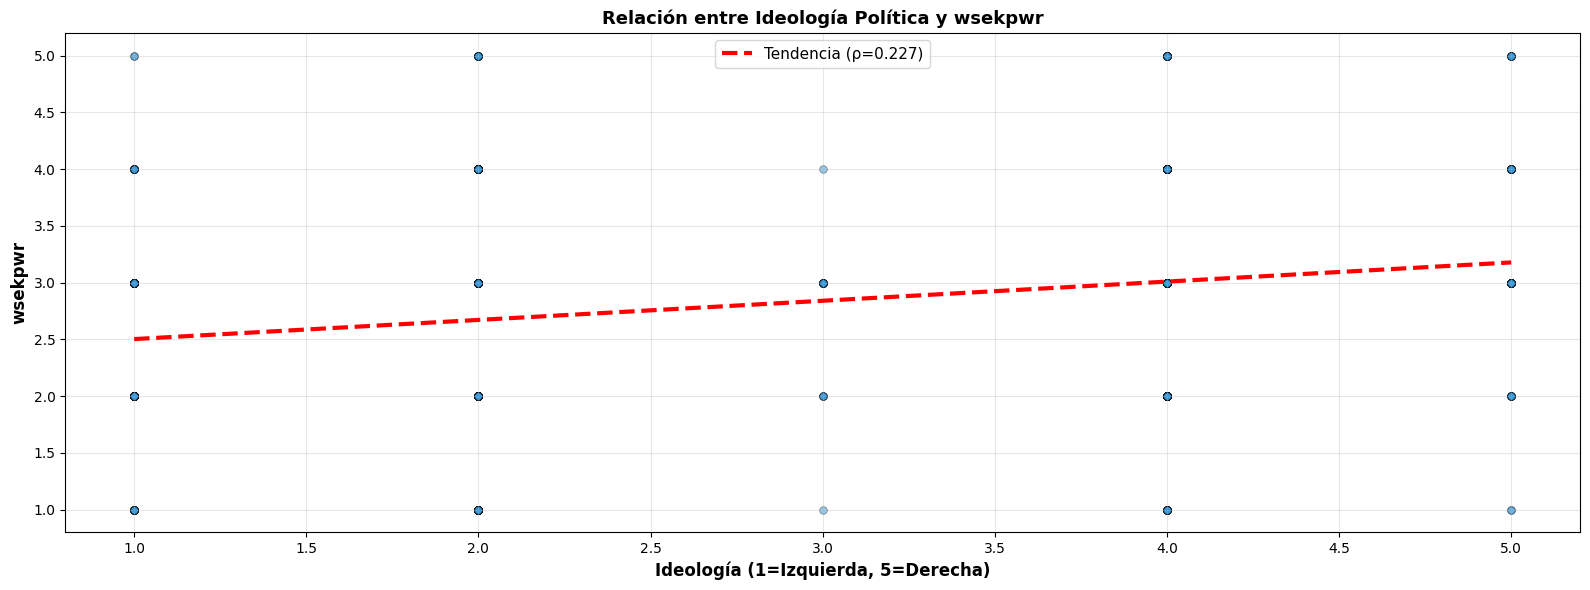

In [115]:
# Visualización: Gráficos de dispersión con líneas de tendencia
fig,(ax1) = plt.subplots(1, figsize=(16, 6))

# Gráfico: Ideología vs wsekpwr
ax1.scatter(df_clean_ideology_wsekpwr['ideology'], df_clean_ideology_wsekpwr['wsekpwr'], 
           alpha=0.5, s=30, color='#3498db', edgecolors='black', linewidths=0.5)

# Línea de tendencia
z1 = np.polyfit(df_clean_ideology_wsekpwr['ideology'], df_clean_ideology_wsekpwr['wsekpwr'], 1)
p1 = np.poly1d(z1)
ax1.plot(df_clean_ideology_wsekpwr['ideology'].sort_values(), 
        p1(df_clean_ideology_wsekpwr['ideology'].sort_values()), 
        "r--", linewidth=3, label=f'Tendencia (ρ={spearman_corr_ideo_wsekpwr:.3f})')

ax1.set_xlabel('Ideología (1=Izquierda, 5=Derecha)', fontsize=12, fontweight='bold')
ax1.set_ylabel('wsekpwr', fontsize=12, fontweight='bold')
ax1.set_title('Relación entre Ideología Política y wsekpwr', fontsize=13, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Análisis multivariante de las variables dependientes

MATRIZ DE CORRELACIÓN DE SPEARMAN - VARIABLES DEPENDIENTES

📊 Coeficientes de correlación:
          ipeqopta  eqpaybg  polintr  imwbcnt  wsekpwr
ipeqopta    1.0000   0.2767   0.0729   0.1174  -0.0599
eqpaybg     0.2767   1.0000   0.1158   0.1882  -0.0929
polintr     0.0729   0.1158   1.0000   0.1631  -0.0320
imwbcnt     0.1174   0.1882   0.1631   1.0000  -0.1201
wsekpwr    -0.0599  -0.0929  -0.0320  -0.1201   1.0000

📊 P-values:
          ipeqopta  eqpaybg  polintr  imwbcnt  wsekpwr
ipeqopta       0.0      0.0      0.0      0.0      0.0
eqpaybg        0.0      0.0      0.0      0.0      0.0
polintr        0.0      0.0      0.0      0.0      0.0
imwbcnt        0.0      0.0      0.0      0.0      0.0
wsekpwr        0.0      0.0      0.0      0.0      0.0


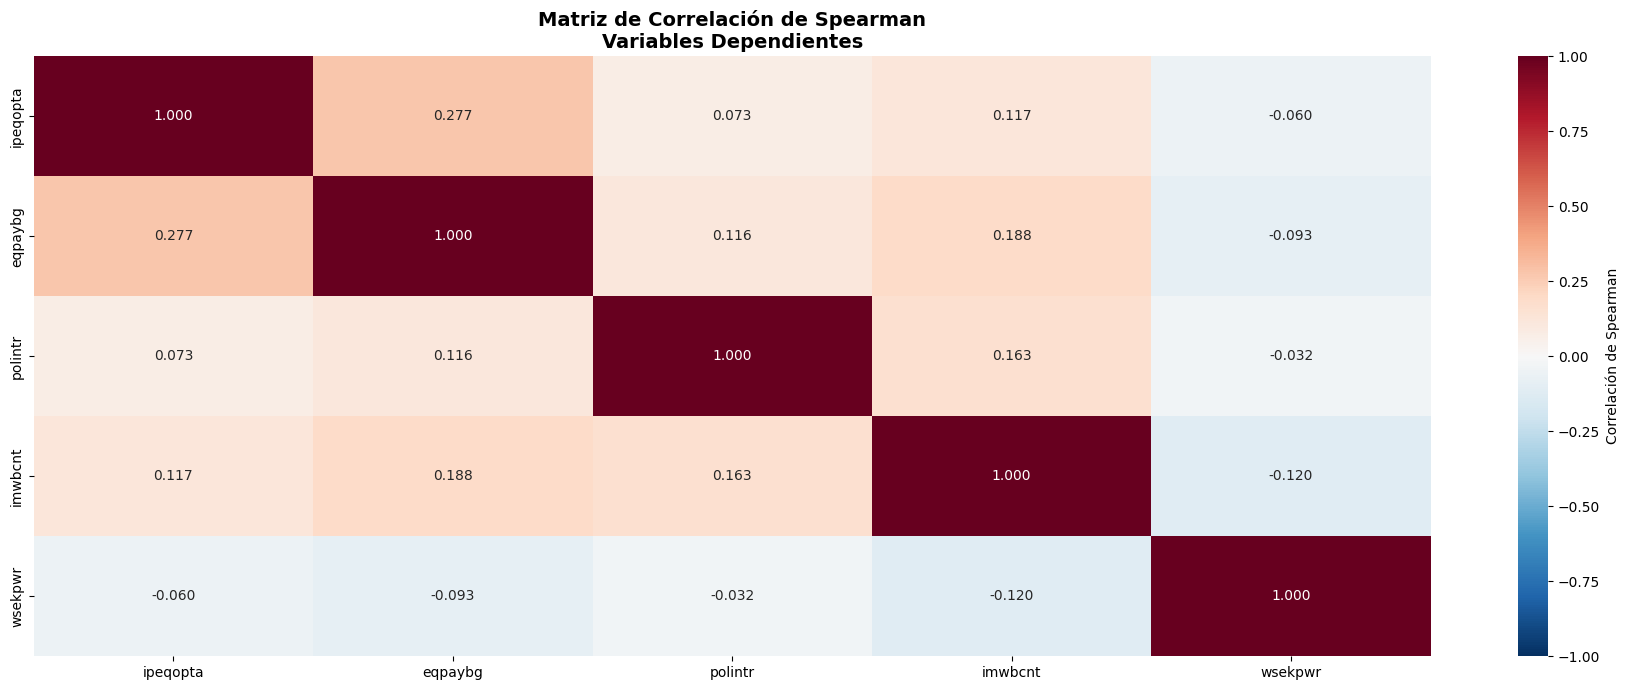


💡 INTERPRETACIONES DESTACADAS:

✓ IPEQOPTA vs EQPAYBG
  Correlación: 0.2767 (DÉBIL)
  P-value: 0.0000e+00 ***

✓ IPEQOPTA vs POLINTR
  Correlación: 0.0729 (MUY DÉBIL)
  P-value: 9.8842e-48 ***

✓ IPEQOPTA vs IMWBCNT
  Correlación: 0.1174 (MUY DÉBIL)
  P-value: 3.1706e-121 ***

✓ IPEQOPTA vs WSEKPWR
  Correlación: -0.0599 (MUY DÉBIL)
  P-value: 8.7965e-33 ***

✓ EQPAYBG vs POLINTR
  Correlación: 0.1158 (MUY DÉBIL)
  P-value: 5.4219e-118 ***

✓ EQPAYBG vs IMWBCNT
  Correlación: 0.1882 (MUY DÉBIL)
  P-value: 0.0000e+00 ***

✓ EQPAYBG vs WSEKPWR
  Correlación: -0.0929 (MUY DÉBIL)
  P-value: 1.6255e-76 ***

✓ POLINTR vs IMWBCNT
  Correlación: 0.1631 (MUY DÉBIL)
  P-value: 1.7257e-233 ***

✓ POLINTR vs WSEKPWR
  Correlación: -0.0320 (MUY DÉBIL)
  P-value: 2.0443e-10 ***

✓ IMWBCNT vs WSEKPWR
  Correlación: -0.1201 (MUY DÉBIL)
  P-value: 6.5852e-127 ***


In [121]:
from scipy.stats import spearmanr

# Correlaciones entre las variables dependientes
# Variables: ipeqopta, eqpaybg, polintr, imwbcnt, wsekpwr

# Filtrar datos válidos para todas las variables
df_multivar = df_clean[['ipeqopta', 'eqpaybg', 'polintr', 'imwbcnt', 'wsekpwr']].dropna()

# Calcular matriz de correlación de Spearman

variables = ['ipeqopta', 'eqpaybg', 'polintr', 'imwbcnt', 'wsekpwr']
n_vars = len(variables)

# Crear matrices para coeficientes de correlación y p-values
corr_matrix = np.zeros((n_vars, n_vars))
pvalue_matrix = np.zeros((n_vars, n_vars))

for i in range(n_vars):
    for j in range(n_vars):
        corr, pval = spearmanr(df_multivar[variables[i]], df_multivar[variables[j]])
        corr_matrix[i, j] = corr
        pvalue_matrix[i, j] = pval

# Crear DataFrames para mejor visualización
corr_df = pd.DataFrame(corr_matrix, index=variables, columns=variables)
pvalue_df = pd.DataFrame(pvalue_matrix, index=variables, columns=variables)

print("=" * 80)
print("MATRIZ DE CORRELACIÓN DE SPEARMAN - VARIABLES DEPENDIENTES")
print("=" * 80)
print("\n📊 Coeficientes de correlación:")
print(corr_df.round(4))
print("\n📊 P-values:")
print(pvalue_df.round(4))

# Visualización con heatmap
fig, ax1 = plt.subplots(1, figsize=(18, 7))

# Heatmap de correlaciones
sns.heatmap(corr_df, annot=True, fmt='.3f', cmap='RdBu_r', center=0, 
            vmin=-1, vmax=1, ax=ax1, cbar_kws={'label': 'Correlación de Spearman'})
ax1.set_title('Matriz de Correlación de Spearman\nVariables Dependientes', 
              fontsize=14, fontweight='bold')


plt.tight_layout()
plt.show()

# Interpretación de las correlaciones más relevantes
print("\n" + "=" * 80)
print("💡 INTERPRETACIONES DESTACADAS:")
print("=" * 80)

# Buscar correlaciones significativas (p < 0.05) excluyendo la diagonal
for i in range(n_vars):
    for j in range(i+1, n_vars):
        if pvalue_matrix[i, j] < 0.05:
            corr_val = corr_matrix[i, j]
            pval = pvalue_matrix[i, j]
            
            # Determinar fuerza
            abs_corr = abs(corr_val)
            if abs_corr < 0.20:
                fuerza = "MUY DÉBIL"
            elif abs_corr < 0.40:
                fuerza = "DÉBIL"
            elif abs_corr < 0.60:
                fuerza = "MODERADA"
            elif abs_corr < 0.80:
                fuerza = "FUERTE"
            else:
                fuerza = "MUY FUERTE"
            
            print(f"\n✓ {variables[i].upper()} vs {variables[j].upper()}")
            print(f"  Correlación: {corr_val:.4f} ({fuerza})")
            print(f"  P-value: {pval:.4e} {'***' if pval < 0.001 else '**' if pval < 0.01 else '*'}")
            
print("=" * 80)